# CDS6314 Data Mining: Association Rule Mining on Marital Satisfaction Data

**Group Members:** 
| Student ID    | Name                            |
| -------------- | ------------------------------ |
| 1211102409    | CHUA KAI ZHENG                 |
| 1211102696    | LEE JIA MENG                   |
| 1211103527    | MUHAMMAD IRFAN HAQIEF BIN RAZAK |
| 1211100917    | NATALIE TAN LI YI              |

**Group Number:**  TT1L_G7

## Introduction

This project aims to perform association rule mining on the "Marital satisfaction, sex, age, marriage duration, religion, number of children, economic status, education, and collectivistic values: Data from 33 countries" dataset (Sorokowski et al., 2017). Understanding the factors that contribute to marital satisfaction is of broad societal interest, potentially informing relationship counseling, social policies, and individual well-being. The primary objective of this project is to uncover interesting associations and patterns within this data, particularly focusing on factors related to marital satisfaction.

We will follow a data mining pipeline involving data exploration, preprocessing, application of association rule mining algorithms, and evaluation of the discovered rules. This notebook documents the Python implementation of these steps.

**Exploratory Questions:**
1.   Are individuals who report high levels on key love and belonging indicators, specifically 'loving their spouse' (love6) AND 'perceiving their relationship as having a romantic side' (love5), frequently associated with 'High Overall Marital Satisfaction'?
2. Do individuals who experience high esteem in their marriage, measured through 'feeling proud of spouse' (esteem2) AND 'respecting spouse' (esteem1), consistently report high levels of marital satisfaction?
3.  What combinations of physical attraction ('finding spouse attractive' - love2) and emotional fulfillment ('happiness with spouse' - happy) create the strongest associations with high marital satisfaction??
4.  Are individuals who strongly endorse collectivistic family values, specifically the belief that 'aging parents should live at home with children' (love9) OR the belief that 'children should live at home until married' (love10), more frequently found to have high marital satisfaction ?

**Project Workflow Overview**

To achieve our objectives, this notebook will systematically proceed through the following key stages of the data mining process:
1. **Import Necessary Libraries:** We will begin by importing all the essential Python libraries required for our analysis. 
2.  **Data Loading and Initial Understanding:** We will begin by loading the dataset and performing initial inspections to understand its structure, content, and basic characteristics.
3.  **Data Cleaning and Preprocessing:** This stage involves preparing the data for analysis. Key tasks include correcting data types, harmonizing measurement scales (e.g., reverse coding), handling out-of-range values, and addressing any missing data.
4.  **Exploratory Data Analysis (EDA):** We will conduct a thorough EDA to uncover patterns, distributions, and relationships within the data. This includes univariate and bivariate analyses, supported by visualizations, to gain insights that will inform subsequent steps.
5.  **Feature Engineering for Association Rule Mining:** Based on EDA findings and our exploratory questions, we will transform relevant variables into a binary categorical format suitable for association rule mining. This typically involves defining thresholds to categorize continuous or ordinal data (e.g., "High" vs. "Low" satisfaction).
6.  **Association Rule Mining (ARM):** The core analytical step where we will apply the Apriori algorithm to the prepared transactional dataset. This will help us identify frequent itemsets (combinations of factors that often occur together) and then generate meaningful association rules (e.g., if X and Y are present, then Z is likely present).
7.  **Results Interpretation and Discussion:** Finally, we will evaluate the discovered association rules based on metrics like support, confidence, and lift. The findings will be interpreted in the context of our exploratory questions, and we will discuss their implications, limitations of the study, and potential avenues for future research.

This structured approach will guide us from raw data to actionable insights about marital satisfaction.



## 1. Import Necessary Libraries

This first crucial step in any data analysis project is to import the software libraries that provide the tools and functions we'll need. For this project, we will be using several key Python libraries:

*   **Pandas:** Essential for data manipulation and analysis. It provides data structures like DataFrames (similar to tables in a spreadsheet or SQL database) that allow us to load, clean, transform, and explore our data efficiently.
*   **NumPy:** Fundamental for numerical computing in Python. It supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. Pandas is built on top of NumPy.
*   **Matplotlib & Seaborn:** These are powerful visualization libraries. 
    *   `Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations. 
    *   `Seaborn` is based on Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics, making it easier to create common plot types like histograms, box plots, and heatmaps.
*   **MLxtend (Machine Learning Extensions):** This library offers various useful tools for data science tasks. Specifically, we will use its `apriori` and `association_rules` functions for performing association rule mining.

By importing these at the beginning, we ensure that all required functionalities are available for the subsequent steps of our analysis pipeline. The code cell below also includes a common practice of setting some Pandas display options to improve the readability of DataFrame outputs during our exploration.

In [1]:
# Install all library if it's not already installed
#%pip install pandas numpy matplotlib seaborn mlxtend openpyxl

In [2]:
# Step 1: Import Necessary Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
from mlxtend.frequent_patterns import apriori, association_rules

# Set display options for pandas to make outputs easier to read during exploration
pd.set_option('display.max_columns', None)      # Ensures all columns of a DataFrame are displayed
pd.set_option('display.max_rows', 100)         # Displays up to 100 rows (useful for peeking at data)
pd.set_option('display.width', 1000)          # Adjusts the display width in the console/notebook for wider tables

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Initial Understanding

The foundational step in any data mining project is to load the data into our analytical environment and gain an initial understanding of its structure, content, and basic characteristics. This phase is crucial as it sets the stage for all subsequent analyses, including cleaning, exploration, and modeling.

In this section (encompassing sub-sections 2.1, 2.2, and 2.3), we will systematically:
*  **2.1 Load the Dataset**: We will import the "Marital satisfaction, sex, age, marriage duration, religion, number of children, economic status, education, and collectivistic values: Data from 33 countries" dataset (Sorokowski et al., 2017). This dataset is provided in an Excel file (`Marital satisfaction_Data.xlsx`). We will use the Pandas library, specifically its `read_excel` function, to load this data into a DataFrame.
*  **2.2 Perform Initial Data Inspection**: Once loaded, we will conduct preliminary checks of the DataFrame. This typically involves:
    *   Displaying the first few rows using `.head()` to get a feel for the data.
    *   Checking the dimensions (number of rows and columns) using `.shape`.
    *   Reviewing data types of columns using `.info()`.
    *   Getting summary statistics for numerical columns using `.describe()`.
    *   Identifying any missing values.
    *   Creating a working copy of the dataset for further modifications.
*  **2.3 Standardize Column Names**: To improve readability and consistency, we will rename the dataset's columns to more concise and meaningful names. This will be guided by a data dictionary that explains each variable.

The primary goal of this overall section is to successfully ingest the data, understand its basic properties, and prepare it with clear, understandable column names before moving on to more detailed preprocessing and exploratory data analysis.

## 2.1 Load Data

In [3]:
## 2.1 Load Datathe Dataset

# Define the path to dataset file. 
# If the file is in the same directory as your Jupyter Notebook, you can just use the filename.
# Otherwise, you'll need to provide the full path to the file.
file_path = 'Marital satisfaction_Data.xlsx' 

try:
    # Attempt to read the data file into a pandas DataFrame.
    df_raw = pd.read_excel(file_path,skiprows=[1,2])
    print("Dataset loaded successfully!")
    
    # Display the dimensions of the loaded DataFrame (number of rows, number of columns)
    print(f"Dataset dimensions (rows, columns): {df_raw.shape}")
    
except FileNotFoundError:
    # If the file is not found at the specified path, print an error message.
    print(f"Error: The file '{file_path}' was not found. Please check the file path and filename.")
    print("Please ensure the dataset file is in the correct location or update the 'file_path' variable.")
    # Create an empty DataFrame if the file is not found to prevent errors in subsequent cells.
    df_raw = pd.DataFrame() 

# Display the first 5 rows of the dataset to get an initial look at its structure and content.
# This helps verify that the data has been loaded correctly.
if not df_raw.empty:
    print("\nFirst 5 rows of the raw dataset (df_raw.head()):")
    print(df_raw.head())

Dataset loaded successfully!
Dataset dimensions (rows, columns): (7178, 31)

First 5 rows of the raw dataset (df_raw.head()):
  Country   Sex (1-M, 2-F)   Age  Marriage duration (years)  Number of children  Number of brought up children  Education (1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree)   Material status (1-much better than average in my country, 2-better than average in my country, 3-similar to average in my country, 4-worse than average in my country, 5-much worse than average in my country)  Religion (1-Protestant, 2-Catholic,  3-Jewish, 4-Muslim, 5-Buddhist, 6-None, 7-Jehovah, 8-Evangelic, 9-Spiritualism, 10-Other - very specific, 11-Orthodox, 12-Hinduism)   Religiosity (1-not religious at all, 7-extremely religious)  Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)  Marriage and Relationships Questionnaire (MRQ) (1-yes, 3-neither yes nor no, 5-no)  Unnamed: 12  Unnam

## 2.2 Initial Data Inspection

Now that the data is loaded, we'll perform some basic inspections to get a better understanding of its characteristics. This includes:
* Viewing the data types of each column.
* Getting summary statistics for numerical columns.
* Checking for missing values.

It's also good practice to create a working copy of the raw dataset. This way, the original loaded data (`df_raw`) remains unchanged, and we can perform all modifications and preprocessing steps on the copy (`df`).

In [4]:
# Step 2.2: Perform Initial Data Inspection and Create Working Copy

if not df_raw.empty:
    
    # 1. Detailed Column Information
    print("\n--- Column Information and Data Types ---")
    df_raw.info()
    
    # 2. Descriptive Statistics
    print("\n--- Descriptive Statistics for Numerical Columns ---")
    print(df_raw.describe())
    
    # 3. Missing Values Analysis
    print("\n--- Missing Values Analysis ---")
    missing_values = df_raw.isnull().sum()
    missing_cols = missing_values[missing_values > 0]
    
    if missing_cols.empty:
        print("No missing values found in any column.")
    else:
        print("Columns with missing values:")
        print(missing_cols)
        
        # Calculate overall missing data percentage
        total_missing = missing_values.sum()
        total_cells = np.prod(df_raw.shape)
        missing_percentage = (total_missing / total_cells) * 100
        print(f"\nTotal missing values: {total_missing}")
        print(f"Overall percentage of missing data: {missing_percentage:.2f}%")

    # Create a working copy of the DataFrame. All subsequent modifications will be done on 'df'.
    df = df_raw.copy()
    print(f"\nWorking copy 'df' created. Shape of 'df': {df.shape}")
    print("Initial inspection complete. The working DataFrame 'df' is now ready for further processing.")

else:
    print("Raw dataset (df_raw) is empty. Cannot proceed with inspection or create a working copy.")


--- Column Information and Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                            --------------  -----  
 0   Country                                                                                                                                                                                                           7178 non-null   object 
 1   Sex (1-M, 2-F)                                                                                                                  

## 2.3 Column Naming

**Reference for Column Mapping (based on Questionnaire):**

We systematically rename the columns based on the questionnaire for better readability and programmatic access.

### Data Dictionary

| Short Form | Explanation                                                                                                                       |
| :--------- | :-------------------------------------------------------------------------------------------------------------------------------- |
| Ctry       | Participant’s country.                                                                                                            |
| Sex        | Sex: 1 Male, 2 Female.                                                                                                            |
| Age        | Participant’s age in years.                                                                                                       |
| MarrY      | Marriage duration in years.                                                                                                       |
| chd        | Number of children respondent has.                                                |
| ChRsd      | Number of children respondent is currently raising.                                                                               |
| Edu        | Education level: 1 No formal education, 2 Primary school, 3 Secondary school, 4 High school or technical college, 5 Bachelor or master degree. |
| MStat      | Respondent’s material situation. Ranging from much worse than average in my country (1) to much better than average in my country (5). |
| raf        | Respondent’s religious affiliation. 1 Protestant, 2 Catholic, 3 Jewish, 4 Muslim, 5 Buddhist, 6 None, 7 Jehovah’s Witness, 8 Evangelical, 9 Spiritualism, 10 Other – very specific, 11 Orthodox, 12 Hinduism. |
| rel        | Respondent’s religiosity. Ranging from Not at all religious (1) to Extremely religious (7).                                         |
| safety     | Respondent’s belief about their ability to rely on pension and social benefits in old age, ranging from “strongly disagree” (1) to “strongly agree” (7). |
| love1      | Respondent’s enjoyment of being in the company of their spouse, options ranging from “no” (1) to “yes” (5).                         |
| happy      | Respondent’s level of happiness, options ranging from “no” (1) to “yes” (5).                                                       |
| love2      | Respondent finds their spouse attractive, options ranging from “no” (1) to “yes” (5).                                              |
| love3      | Respondent enjoys doing things together with their spouse, options ranging from “no” (1) to “yes” (5).                              |
| love4      | Respondent enjoys cuddling with their spouse, options ranging from “no” (1) to “yes” (5).                                          |
| esteem1    | Respondent respects their spouse, options ranging from “no” (1) to “yes” (5).                                                     |
| esteem2    | Respondent is proud of their spouse, options ranging from “no” (1) to “yes” (5).                                                  |
| love5      | Respondent feels the relationship has a romantic side, options ranging from “no” (1) to “yes” (5).                                  |
| love6      | Respondent loves their spouse, options ranging from “no” (1) to “yes” (5).                                                        |
| ms1        | Respondent satisfaction with the marriage, ranging from Very dissatisfied (1) to Very satisfied (7).                                |
| ms2        | Respondent satisfaction with spouse as a partner, ranging from Very dissatisfied (1) to Very satisfied (7).                         |
| ms3        | Respondent satisfaction with the relationship overall, ranging from Very dissatisfied (1) to Very satisfied (7).                    |
| esteem3    | In this society, children take pride in parents’ accomplishments, ranging from Strongly disagree (1) to Strongly agree (7).         |
| esteem4    | In this society, parents take pride in children’s accomplishments, ranging from Strongly disagree (1) to Strongly agree (7).        |
| love7      | In this society, aging parents live at home with children, ranging from Strongly disagree (1) to Strongly agree (7).                |
| love8      | In this society, children live at home with parents until marriage, ranging from Strongly disagree (1) to Strongly agree (7).       |
| esteem5    | Respondent thinks children should take pride in parents’ accomplishments, ranging from Strongly disagree (1) to Strongly agree (7). |
| esteem6    | Respondent thinks parents should take pride in children’s accomplishments, ranging from Strongly disagree (1) to Strongly agree (7). |
| love9      | Respondent thinks aging parents should live at home with children, ranging from Strongly disagree (1) to Strongly agree (7).        |
| love10     | Respondent thinks children can live at home with parents until marriage, ranging from Strongly disagree (1) to Strongly agree (7).  |

In [5]:
# Step 2.3: Standardizing and Renaming Columns

if not df_raw.empty:  # Check if df_raw (and thus df, its copy) was loaded successfully
    
    # Define the desired final column names.
    # This list must match the number and intended order of columns in the DataFrame.
    final_column_names = [
        'Ctry', 'Sex', 'Age', 'MarrY', 'chd', 'ChRsd', 'Edu', 'MStat', 'raf', 'rel', 'safety', 
        'love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6', 
        'ms1', 'ms2', 'ms3', 
        'esteem3', 'esteem4', 'love7', 'love8', # CI National items
        'esteem5', 'esteem6', 'love9', 'love10'  # CI Individual items
    ]
    
    # Check if the number of new names matches the number of columns in the DataFrame
    if len(final_column_names) == df.shape[1]:
        df.columns = final_column_names
        print("New column names are:")
        print(df.columns.tolist())
        print(f"Shape of DataFrame after renaming: {df.shape}")
    else:
        # If counts don't match, print a concise warning.
        print(f"Warning: Column count mismatch. DataFrame has {df.shape[1]} columns, "
              f"but {len(final_column_names)} names were provided in 'final_column_names'.")
        print("Column renaming aborted. Please check the 'final_column_names' list.")

else:
    print("DataFrame 'df' is empty. Cannot rename columns.")


New column names are:
['Ctry', 'Sex', 'Age', 'MarrY', 'chd', 'ChRsd', 'Edu', 'MStat', 'raf', 'rel', 'safety', 'love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6', 'ms1', 'ms2', 'ms3', 'esteem3', 'esteem4', 'love7', 'love8', 'esteem5', 'esteem6', 'love9', 'love10']
Shape of DataFrame after renaming: (7178, 31)


## 3. Data Cleaning and Preprocessing

Following the initial data loading and inspection, this section details the critical steps undertaken to clean and preprocess the dataset. Effective data cleaning is paramount to ensure the reliability and validity of our subsequent analyses, particularly for association rule mining. The primary goals of this phase are to correct data inconsistencies, harmonize measurement scales, handle invalid or out-of-range entries, and ultimately produce a high-quality dataset ready for exploratory data analysis and feature engineering.

This section is organized as follows:

*   **3.1. Basic Data Type Verification and Correction:** We begin by verifying that all columns intended for numerical calculations are indeed recognized as numeric data types by our analysis tools. Any columns that are incorrectly typed (e.g., numbers stored as text) will be converted, with non-convertible entries being set to `NaN` (Not a Number).
*   **3.2. Scale Direction Harmonization (Reverse Coding):** Many survey items use scales where, for example, a lower number might indicate a more positive response (e.g., 1 for 'Yes', 5 for 'No'). To make interpretation more intuitive and consistent across variables (i.e., higher scores representing more of an attribute like agreement or satisfaction), we will reverse code specific items. This involves transforming their values so that the scale direction is harmonized.
*   **3.3. Comprehensive Data Cleaning: Validating and Correcting Out-of-Range Values:** We will meticulously examine variables to ensure their values fall within theoretically expected ranges (e.g., a 1-5 scale should not contain a 7). Any values found to be outside these valid ranges, likely due to data entry errors, will be converted to `NaN` to treat them as missing data.
*   **3.4. Data Quality Summary:** After performing the above cleaning operations, we will generate a summary of the dataset's quality. This includes an updated overview of missing values, data type distributions, and the number of duplicate entries, providing a clear picture of the dataset's integrity before proceeding to more advanced analysis.

These steps are crucial for preparing the data for the subsequent Exploratory Data Analysis (EDA) and the specific transformations required for association rule mining.

### 3.1. Basic Data Type Verification and Correction
Before proceeding with transformations like reverse coding or detailed exploration, we will verify and ensure that all columns intended for numerical operations are indeed of a numeric data type. Any non-convertible entries will be coerced to `NaN`.

In [6]:
print("\n--- Verifying and Correcting Numeric Data Types ---")

columns_that_should_be_numeric = [
    'Age', 'MarrY', 'chd', 'ChRsd', 'Edu', 'MStat', 'raf', 'rel', 'safety', 
    'love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6', 
    'ms1', 'ms2', 'ms3', 
    'esteem3', 'esteem4', 'love7', 'love8', 'esteem5', 'esteem6', 'love9', 'love10'
] # Note: 'Sex' (1,2) is also numeric but often better as 'category' for plots.
  # 'Ctry' is object/string.

changed_cols = []
for col in columns_that_should_be_numeric:
    if col in df.columns:
        # Check if it's not already a float or int type
        if not pd.api.types.is_numeric_dtype(df[col]) or df[col].dtype == 'object':
            original_dtype = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].dtype != original_dtype:
                changed_cols.append(col)
                print(f"Column '{col}' converted from {original_dtype} to {df[col].dtype}.")
    else:
        print(f"Warning: Column '{col}' not found for data type check.")

if changed_cols:
    print(f"\nColumns converted to numeric: {changed_cols}")
else:
    print("\nAll specified columns were already of a suitable numeric type or not found.")

print("\n--- Sample of Data types after verification/correction ---")
print(df.dtypes)



--- Verifying and Correcting Numeric Data Types ---

All specified columns were already of a suitable numeric type or not found.

--- Sample of Data types after verification/correction ---
Ctry        object
Sex          int64
Age        float64
MarrY      float64
chd          int64
ChRsd        int64
Edu          int64
MStat        int64
raf        float64
rel          int64
safety       int64
love1        int64
happy        int64
love2        int64
love3        int64
love4        int64
esteem1      int64
esteem2      int64
love5        int64
love6        int64
ms1          int64
ms2          int64
ms3          int64
esteem3      int64
esteem4      int64
love7        int64
love8        int64
esteem5      int64
esteem6      int64
love9        int64
love10       int64
dtype: object


### 3.2. Scale Direction Harmonization (Reverse Coding)
For many of our scale items, the original questionnaire coding might be counter-intuitive for analysis where we want a "higher score to represent a more positive attribute" or "more of a construct."

In this step, we will reverse code these specific variables. This ensures that when we perform Exploratory Data Analysis (like correlation analysis) and subsequent modeling, a higher numerical score consistently represents a more "positive" or "higher quantity" attribute. This makes interpretation more straightforward.

In [7]:
print("\n--- Starting Reverse Coding for Scale Harmonization ---")

# Ensure columns are numeric before attempting arithmetic for reverse coding
# This should have been handled in the previous step, but double-checking or re-applying
# pd.to_numeric here on the specific columns before reversing is a safe practice.

# --- 1. MStat ---
# Original MStat (Q7): 1=Much Better, 5=Much Worse.
if 'MStat' in df.columns:
    df['MStat'] = pd.to_numeric(df['MStat'], errors='coerce') # Ensure numeric
    # Check for existing NaNs before operating
    nan_before = df['MStat'].isnull().sum()
    df['MStat'] = (5 + 1) - df['MStat'] 
    nan_after = df['MStat'].isnull().sum()
    if nan_after > nan_before : print(f"NaNs introduced in MStat during reversal. Original NaNs: {nan_before}, New NaNs: {nan_after}")
    print(f"'MStat' column reverse coded (now higher score = better material status). Original min/max values would be flipped.")
    print(f"Example values for 'MStat' after reverse coding:\n{df['MStat'].value_counts().sort_index().head()}")
else:
    print("Warning: Column 'MStat' not found for reverse coding.")

# --- 2. safety ---
if 'safety' in df.columns:
    df['safety'] = pd.to_numeric(df['safety'], errors='coerce') # Ensure numeric
    nan_before = df['safety'].isnull().sum()
    df['safety'] = (7 + 1) - df['safety']
    nan_after = df['safety'].isnull().sum()
    if nan_after > nan_before : print(f"NaNs introduced in safety during reversal. Original NaNs: {nan_before}, New NaNs: {nan_after}")
    print(f"\n'safety' (Pension View) column reverse coded (now higher score = more agreement/perceived safety).")
    print(f"Example values for 'safety' after reverse coding:\n{df['safety'].value_counts().sort_index().head()}")
else:
    print("Warning: Column 'safety' not found for reverse coding.")

# --- 3. MRQ Items (love1-love6, happy, esteem1, esteem2 - Q11-Q19) ---
# Original: 1=Yes (positive response), 5=No (negative response).
# Target: Higher score = More Positive Response (e.g., 5 = Yes).
mrg_items_to_reverse = ['love1', 'happy', 'love2', 'love3', 'love4', 
                        'esteem1', 'esteem2', 'love5', 'love6']
print("\nReversing MRQ items...")
for item in mrg_items_to_reverse:
    if item in df.columns:
        df[item] = pd.to_numeric(df[item], errors='coerce') # Ensure numeric
        nan_before = df[item].isnull().sum()
        df[item] = (5 + 1) - df[item]
        nan_after = df[item].isnull().sum()
        if nan_after > nan_before : print(f"NaNs introduced in {item} during reversal. Original NaNs: {nan_before}, New NaNs: {nan_after}")
        # print(f"MRQ item '{item}' reversed (higher now means original 'Yes').") # Optional print for each
    else:
        print(f"Warning: MRQ Column '{item}' not found for reverse coding.")
print("All specified MRQ items processed for reverse coding.")
if 'love1' in df.columns:
    print("Example MRQ item 'love1' after reversal (higher score now represents the original 'Yes' response):")
    print(df['love1'].value_counts().sort_index())


# --- 4. CI Items (esteem3-esteem6, love7-love10 - S2Q1-S2Q8) ---
# Original: 1=Strongly Agree, 7=Strongly Disagree.
#  Target for this EDA step : 1=Strongly Disagree , 7 = Strongly Agree.
# This will apply (8 - old_score) to ALL CI items.
ci_items_all = ['esteem3', 'esteem4', 'love7', 'love8', 
                'esteem5', 'esteem6', 'love9', 'love10']
print("\nReversing ALL CI items so higher score = stronger agreement with the statement...")
for item in ci_items_all:
    if item in df.columns:
        df[item] = pd.to_numeric(df[item], errors='coerce')
        df[item] = (7 + 1) - df[item] # Reverse all CI items
    else:
        print(f"Warning: CI Column '{item}' not found for reverse coding.")
print("All CI items processed: higher score now means stronger agreement with the statement as written.")


print("\n--- Scale Direction Harmonization (Reverse Coding) Complete ---")
# Display dtypes to confirm numeric types are maintained for a sample
sample_cols_for_dtype_check_after_rev = ['MStat', 'safety', 'love1', 'ms1', 'love7', 'esteem3']
existing_sample_cols_rev = [col for col in sample_cols_for_dtype_check_after_rev if col in df.columns]
if existing_sample_cols_rev:
    print("\nData types after reverse coding (sample):")
    print(df[existing_sample_cols_rev].dtypes)


--- Starting Reverse Coding for Scale Harmonization ---
'MStat' column reverse coded (now higher score = better material status). Original min/max values would be flipped.
Example values for 'MStat' after reverse coding:
MStat
0      13
1      83
2     593
3    3692
4    2044
Name: count, dtype: int64

'safety' (Pension View) column reverse coded (now higher score = more agreement/perceived safety).
Example values for 'safety' after reverse coding:
safety
1     849
2     838
3     612
4    1118
5    1324
Name: count, dtype: int64

Reversing MRQ items...
All specified MRQ items processed for reverse coding.
Example MRQ item 'love1' after reversal (higher score now represents the original 'Yes' response):
love1
0       2
1      99
2     137
3     415
4    1526
5    4999
Name: count, dtype: int64

Reversing ALL CI items so higher score = stronger agreement with the statement...
All CI items processed: higher score now means stronger agreement with the statement as written.

--- Scale Dir

### 3.3 Comprehensive Data Cleaning: Validating and Correcting Out-of-Range Values 

During the Exploratory Data Analysis , it was observed that some variables contained values outside their expected theoretical ranges . These likely represent data entry errors or other anomalies.

In this step, we will convert these identified invalid values to `NaN` (Not a Number) to ensure they are treated as missing data and do not skew subsequent analyses.

In [8]:
# Helper function to clean a column based on an expected range 
def apply_cleaning_rules_silent(df, col_name, config):
    if col_name not in df.columns:
        return df #  skip if column is not found

    temp_col_data = df[col_name].copy() # Work on a copy

    rule_type = config.get('type')
    invalid_mask = pd.Series(False, index=temp_col_data.index)

    if rule_type == 'categorical':
        valid_categories = config.get('valid_categories')
        if valid_categories is not None:
            invalid_mask = ~temp_col_data.isin(valid_categories) & temp_col_data.notna()
        else: return df # Invalid config

    elif rule_type == 'range':
        min_val = config.get('min')
        max_val = config.get('max')
        if min_val is not None and max_val is not None:
            if not pd.api.types.is_numeric_dtype(temp_col_data):
                temp_col_data = pd.to_numeric(temp_col_data, errors='coerce')
            invalid_mask = ((temp_col_data < min_val) | (temp_col_data > max_val)) & temp_col_data.notna()
        else: return df # Invalid config
    else: # Invalid rule type
        return df #  skip unknown rule types

    # Apply cleaning to the original DataFrame if invalid values exist
    if invalid_mask.any():
        df.loc[invalid_mask, col_name] = np.nan

    return df

# --- Define Cleaning Configuration (Focusing on scales/categories) ---
cleaning_rules = {
    # Strict Categorical Codes
    'Sex':   {'type': 'categorical', 'valid_categories': [1, 2]},
    'Edu':   {'type': 'categorical', 'valid_categories': [1, 2, 3, 4, 5]},
    'raf':   {'type': 'categorical', 'valid_categories': list(range(1, 13))},

    # Scales 1-5
    'MStat': {'type': 'range', 'min': 1, 'max': 5},
    # Scales 1-7
    'rel':   {'type': 'range', 'min': 1, 'max': 7},
    'safety':{'type': 'range', 'min': 1, 'max': 7},
}

# Add rules for item lists (MRQ: 1-5, KMSS: 1-7, CI: 1-7)
mrq_items = ['love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6']
for item in mrq_items:
    cleaning_rules[item] = {'type': 'range', 'min': 1, 'max': 5}

kmss_items = ['ms1', 'ms2', 'ms3']
for item in kmss_items:
    cleaning_rules[item] = {'type': 'range', 'min': 1, 'max': 7}

ci_items = ['esteem3', 'esteem4', 'love7', 'love8', 'esteem5', 'esteem6', 'love9', 'love10']
for item in ci_items:
    cleaning_rules[item] = {'type': 'range', 'min': 1, 'max': 7}

# defined cleaning rules 
for col, config in cleaning_rules.items():
    df = apply_cleaning_rules_silent(df, col, config)


# Final Missing Value Check
missing_values_summary = df.isnull().sum()
cols_with_missing = missing_values_summary[missing_values_summary > 0].sort_values(ascending=False)

if not cols_with_missing.empty:
    print("Columns with missing values:")
    print(cols_with_missing)
else:
    print("No missing values found in any columns checked after range cleaning.")



Columns with missing values:
raf        86
love6      31
MStat      13
love5       4
love1       2
esteem2     1
dtype: int64


### 3.4. Data Quality Summary

Now that we have completed the basic data cleaning steps, let's summarize the quality of our dataset. This summary will help us understand the overall integrity of our data before we proceed with feature engineering and association rule mining.

In [9]:
# Step 3.5: Perform Data Quality Summary

# Calculate basic quality metrics
print("--- Data Quality Summary ---")

# 1. Dataset dimensions after cleaning
print(f"Dataset dimensions (rows, columns): {df.shape}")

# 2. Missing values summary
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0].sort_values(ascending=False)

if missing_cols.empty:
    print("\nNo missing values found in any column.")
else:
    print("\nColumns with missing values:")
    print(missing_cols)
    
    # Calculate percentage of missing values per column
    missing_percentage = (missing_cols / len(df)) * 100
    print("\nPercentage of missing values per column:")
    print(missing_percentage.round(2))
    
    # Calculate overall missing data percentage
    total_missing = missing_values.sum()
    total_cells = np.prod(df.shape)
    overall_missing_percentage = (total_missing / total_cells) * 100
    print(f"\nTotal missing values: {total_missing}")
    print(f"Overall percentage of missing data: {overall_missing_percentage:.2f}%")

# 3. Data type summary
print("\nData type distribution:")
type_counts = df.dtypes.value_counts()
print(type_counts)

# 4. Duplicate rows check
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicate rows: {(duplicate_count / len(df)) * 100:.2f}%")





--- Data Quality Summary ---
Dataset dimensions (rows, columns): (7178, 31)

Columns with missing values:
raf        86
love6      31
MStat      13
love5       4
love1       2
esteem2     1
dtype: int64

Percentage of missing values per column:
raf        1.20
love6      0.43
MStat      0.18
love5      0.06
love1      0.03
esteem2    0.01
dtype: float64

Total missing values: 137
Overall percentage of missing data: 0.06%

Data type distribution:
int64      22
float64     8
object      1
Name: count, dtype: int64

Number of duplicate rows: 56
Percentage of duplicate rows: 0.78%


## 4. Data Exploration (EDA - Exploratory Data Analysis)

Following the data loading, initial inspection, and cleaning/preprocessing phases, this section is dedicated to Exploratory Data Analysis (EDA). EDA is a critical step in the data mining pipeline that allows us to delve deeper into the dataset. The primary objectives of EDA are to systematically examine the data, uncover underlying structures, identify important variables, detect anomalies and outliers, test underlying assumptions, and develop insights that can guide further analysis. This process involves summarizing the main characteristics of the data, often with visual methods.

This section is organized as follows:

*   **4.1. Univariate Analysis:** We will start by examining each variable individually to understand its distribution, central tendency, and spread. This includes generating descriptive statistics and visualizations like histograms and box plots for numerical variables, and frequency tables and bar charts for categorical variables.
*   **4.2. Bivariate Analysis:** Next, we will explore the relationships between pairs of variables. This involves looking at correlations between numerical variables (visualized with heatmaps), comparing numerical variables across different categories (using box plots), and examining relationships between two numerical variables (using scatter plots). This subsection also incorporates initial multivariate visualizations, such as grouped box plots, to understand how a third variable might influence the relationship between two primary variables.
*   **4.3. Multivariate Analysis:** This subsection is intended for more advanced multivariate techniques that look at the simultaneous relationships among three or more variables, beyond the grouped visualizations covered in Bivariate Analysis. (This section can be developed further if specific techniques like PCA, factor analysis, or clustering are applied).

This comprehensive exploration will help us build a strong intuition about the data and ensure that our subsequent association rule mining is based on a solid understanding of the underlying factors related to marital satisfaction. The key findings and visualizations from this EDA process will be summarized and form an important part of our analysis and report.

### 4.1. Univariate Analysis

Univariate analysis is the first step in our EDA process, where we focus on examining each key variable in the dataset individually. The goal is to understand the intrinsic characteristics of each feature before exploring its relationships with other variables. This individual examination helps us to:

*   **Describe Central Tendency:** Identify typical values (e.g., mean, median, mode).
*   **Assess Dispersion:** Understand the spread or variability of the data (e.g., range, variance, standard deviation, interquartile range).
*   **Visualize Distribution:** Observe the shape of the data distribution (e.g., symmetric, skewed, unimodal, multimodal).
*   **Identify Outliers:** Detect unusual or extreme values that might warrant further investigation or special handling.
*   **Check Data Quality:** Confirm that the values for each variable are within expected ranges and make sense in the context of what they represent.

We will tailor our univariate analysis approach based on the type of variable:

*   **Numerical Variables:** For variables that represent quantities (e.g., 'Age', 'MarrY', scores on various scales like 'love1', 'ms1'), we will compute descriptive statistics (mean, median, min, max, quartiles, standard deviation), examine their value counts (especially for discrete scales), and visualize their distributions using histograms (to see the shape) and box plots (to identify central tendency, spread, and outliers).
*   **Categorical Variables:** For variables that represent distinct groups or categories, even if numerically coded (e.g., 'Sex', 'Edu', 'Ctry'), we will focus on frequency distributions (counts and percentages of each category) and visualize these using bar charts.

This detailed look at each variable provides a foundational understanding necessary for the subsequent bivariate and multivariate analyses, as well as for making informed decisions during feature engineering.



### 4.1.1. Univariate Analysis - Numerical Variables

This subsection focuses on the univariate analysis of numerical variables within our dataset. Numerical variables are those that represent a measurable quantity. For each selected numerical variable, the Python code below performs the following steps:

1.  **Data Type Coercion**: Ensures that the column is treated as a numeric data type. Any values that cannot be converted to numbers are changed to `NaN` (Not a Number).
2.  **Descriptive Statistics**: Calculates and prints key summary statistics, including count, mean, standard deviation, minimum, maximum, and quartile values. This provides a quantitative overview of each variable's distribution.
3.  **Value Counts**: Displays the frequency of each unique value within the variable, including `NaN` values. This is particularly useful for understanding the distribution of discrete numerical scales or identifying any unexpected or sparse values.
4.  **Visualizations**: Generates two types of plots to visually inspect the distribution:
    *   **Histogram**: A histogram is plotted to show the frequency distribution of the variable. A Kernel Density Estimate (KDE) is overlaid if the variable is not a discrete scale with few unique values, providing a smoothed representation of the distribution's shape. The number of bins is automatically determined.
    *   **Box Plot**: A box plot is generated to visualize the variable's central tendency (median), spread (interquartile range), and potential outliers. 

These analyses are performed for a predefined list of numerical columns, including demographic information (e.g., `Age`, `MarrY`), religiosity (`rel`), financial security perception (`safety`), and various items from the Marital Relationship Questionnaire (MRQ), Kansas Marital Satisfaction Scale (KMSS), and Collectivism Inventory (CI).

In [ ]:
# Step 4.1.1: Univariate Analysis - Numerical Variables

# List of numerical columns to analyze 
numerical_cols = [
    'Age', 'MarrY', 'chd', 'ChRsd', 'rel', 'safety',  # Demographics, Religiosity, Pension View
    'love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6', # MRQ items
    'ms1', 'ms2', 'ms3', # Marital satisfaction items
    'esteem3', 'esteem4', 'love7', 'love8', 'esteem5', 'esteem6', 'love9', 'love10' # CI items
]

# Ensure all these columns exist in the DataFrame to avoid errors
numerical_cols_present = [col for col in numerical_cols if col in df.columns]
if len(numerical_cols_present) != len(numerical_cols):
    print("Warning: Some specified numerical columns are not in the DataFrame. Check column names.")
    print(f"Found: {numerical_cols_present}")
    print(f"Expected: {numerical_cols}")

print(f"--- Analyzing {len(numerical_cols_present)} Numerical Variables ---")

for col_name in numerical_cols_present:
    print(f"\n\n--- Univariate Analysis for: {col_name} ---")
    
    # 1. Ensure the column is numeric (it might have been read as object if there were mixed types or errors)
    # errors='coerce' will turn any non-convertible values into NaN
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    
    # 2. Descriptive Statistics
    print(f"Descriptive Statistics for {col_name}:")
    print(df[col_name].describe().round(2)) # .round(2) for cleaner output

    # 3. Value Counts 
    print(f"\nValue Counts for {col_name} :")
    print(df[col_name].value_counts(dropna=False).sort_index())
    print("-" * 50)
    
    # 4. Visualizations (Histogram and Box Plot)
    
    # Histogram with KDE
    plt.figure(figsize=(8, 4)) # Create a new figure for the histogram
    data_to_plot_hist = df[col_name].dropna()
    if not data_to_plot_hist.empty:
        # For count-like data or scales with few distinct integers, discrete=True can be better
        is_discrete_scale = data_to_plot_hist.nunique() < 15 # Heuristic for "few distinct integers"
        sns.histplot(data_to_plot_hist, kde= (not is_discrete_scale), bins='auto', discrete=is_discrete_scale and (data_to_plot_hist.dtype == 'int64' or data_to_plot_hist.apply(float.is_integer).all()))
        plt.title(f'Distribution of {col_name}')
        plt.xlabel(col_name); plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Not enough valid data to plot histogram', ha='center', va='center')
        plt.title(f'Distribution of {col_name} (No Data)')
    plt.show()


    # Box Plot
    plt.figure(figsize=(6, 8)) # Create a new figure for the box plot
    data_to_plot_box = df[col_name].dropna()
    if not data_to_plot_box.empty:
        sns.boxplot(y=data_to_plot_box) # Use y for vertical boxplot
        plt.title(f'Box Plot of {col_name}')
        plt.ylabel(col_name)
    else:
        plt.text(0.5, 0.5, 'Not enough valid data to plot boxplot', ha='center', va='center')
        plt.title(f'Box Plot of {col_name} ')
    plt.show()



print("\n--- Univariate analysis for numerical variables complete. ---")


### 4.1.2. Univariate Analysis - Categorical Variables

This subsection details the univariate analysis of categorical variables. Categorical variables represent distinct groups or labels, even if they are numerically encoded (e.g., 'Sex' where 1 might be Male and 2 Female). For each selected categorical variable, the Python code below executes the following procedures:

1.  **Data Type Conversion**: Attempts to convert the column to a 'category' data type in pandas if it isn't already. For numerically coded categories, it also tries to convert them to a nullable integer type (`Int64`) if appropriate, which can help in handling potential missing values gracefully while maintaining the categorical nature.
2.  **Frequency Counts**: Calculates and prints the absolute frequency (count) and relative frequency (percentage) of each unique category within the variable. This includes `NaN` values to provide a complete picture of the data.
3.  **Visualizations (Bar Chart/Count Plot)**: Generates a bar chart (using `seaborn.countplot` or `pandas.plot(kind='barh')`) to visually represent the frequency distribution of the categories. 
    *   If the number of unique categories is large (e.g., for 'Ctry' or 'raf' which have many distinct values), the code plots a horizontal bar chart showing only the top N (e.g., top 15) most frequent categories for better readability.
    *   For variables with fewer categories, a standard vertical bar chart is used.

The categorical variables analyzed include 'Sex', 'Edu' (Education Level), 'MStat' (Material Situation - which is treated as categorical here despite its ordinal nature, due to the distinct levels), 'raf' (Religious Affiliation), and 'Ctry' (Country).



--- Analyzing 5 Categorical Variables ---


--- Univariate Analysis for: Sex ---
Value Counts for Sex ):
     Count  Percentage
Sex                   
1     3351       46.68
2     3827       53.32


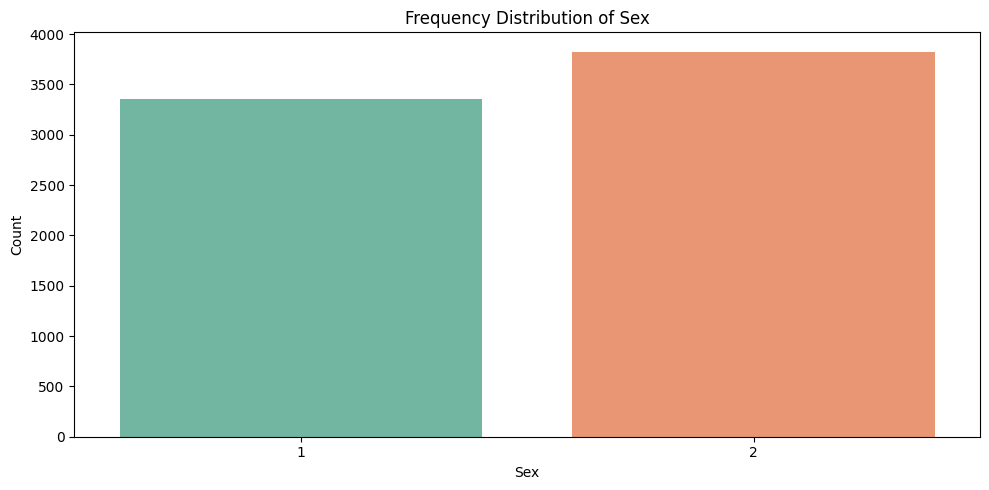

--------------------------------------------------


--- Univariate Analysis for: Edu ---
Value Counts for Edu ):
     Count  Percentage
Edu                   
1       63        0.88
2      358        4.99
3     1124       15.66
4     1860       25.91
5     3773       52.56


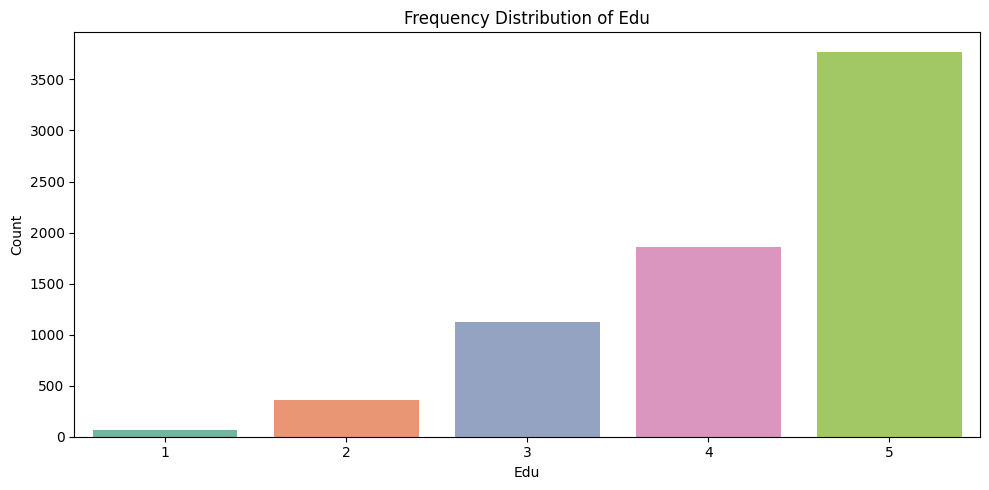

--------------------------------------------------


--- Univariate Analysis for: MStat ---
Value Counts for MStat ):
       Count  Percentage
MStat                   
1         83        1.16
2        593        8.26
3       3692       51.43
4       2044       28.48
5        753       10.49
NaN       13        0.18


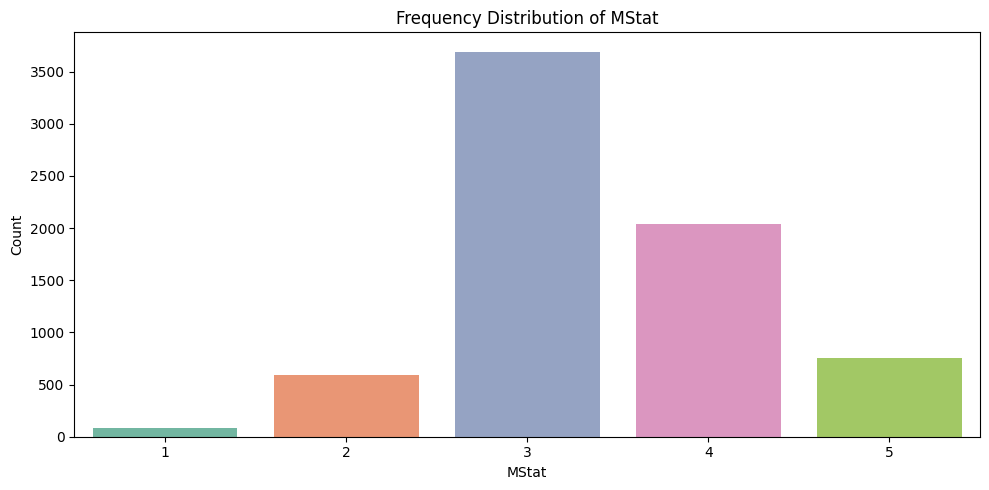

--------------------------------------------------


--- Univariate Analysis for: raf ---
Value Counts for raf ):
     Count  Percentage
raf                   
1      925       12.89
2     2582       35.97
3       38        0.53
4     1572       21.90
5       76        1.06
6     1041       14.50
7       54        0.75
8        2        0.03
9       44        0.61
10      59        0.82
11     449        6.26
12     250        3.48
NaN     86        1.20


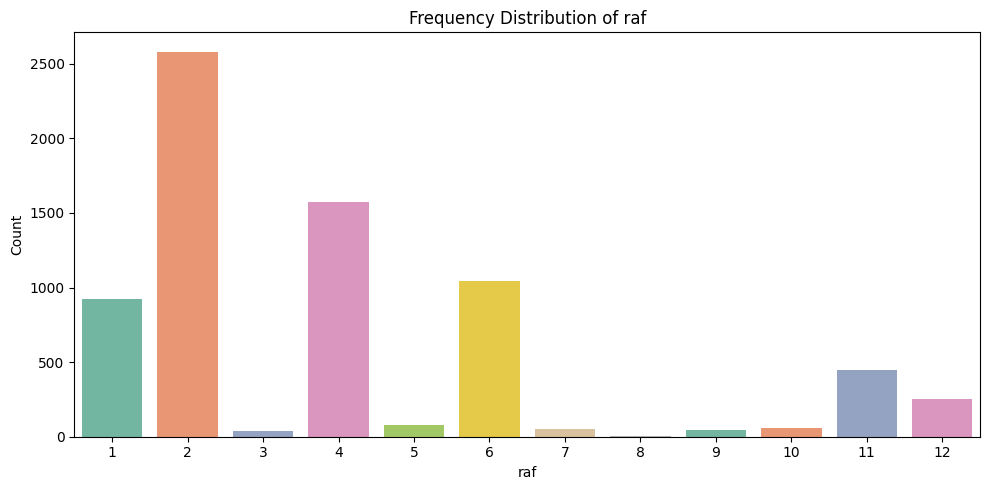

--------------------------------------------------


--- Univariate Analysis for: Ctry ---
Value Counts for Ctry ):
              Count  Percentage
Ctry                           
Brazil          481        6.70
Bulgaria        102        1.42
Canada           69        0.96
China           119        1.66
Croatia         611        8.51
Estonia         150        2.09
Germany         101        1.41
Ghana           103        1.43
Greece           95        1.32
HongKong         99        1.38
Hungary         236        3.29
India           299        4.17
Indonesia        88        1.23
Iran            605        8.43
Italy           316        4.40
Kazakhstan      120        1.67
Kenia            94        1.31
Malaysia         99        1.38
Mexico          168        2.34
Nigeria         594        8.28
Pakistan        131        1.83
Poland          444        6.19
Portugal        281        3.91
Romania          53        0.74
Russia          224        3.12
Saudi Arabia    199 

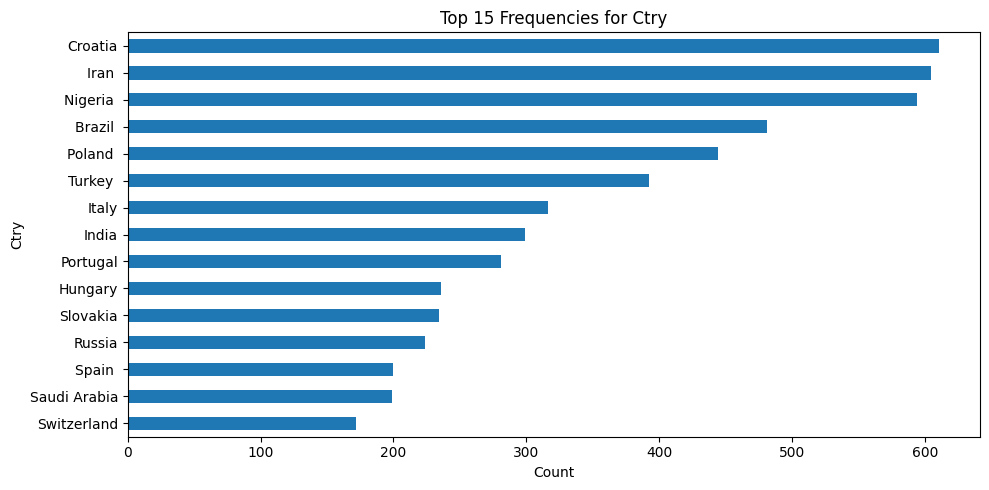

--------------------------------------------------


In [11]:
# Step 4.1.2: Univariate Analysis - Categorical Variables

# List of categorical columns to analyze (using YOUR short forms)
categorical_cols = ['Sex', 'Edu', 'MStat', 'raf', 'Ctry'] 
# Note: MStat and Edu are numerically coded but represent distinct categories.

# Ensure all these columns exist
categorical_cols_present = [col for col in categorical_cols if col in df.columns]
if len(categorical_cols_present) != len(categorical_cols):
    print("Warning: Some specified categorical columns are not in the DataFrame. Check column names.")

print(f"\n--- Analyzing {len(categorical_cols_present)} Categorical Variables ---")

for col_name in categorical_cols_present:
    print(f"\n\n--- Univariate Analysis for: {col_name} ---")
    
    # 1. Ensure correct data type (optional but good practice, can help with plotting)
    # If the column contains numbers that represent categories (like Sex: 1, 2), 
    # converting to 'category' dtype can be beneficial for some pandas/seaborn functions.
    # If it's already text (like Country), it's fine.
    if df[col_name].dtype != 'category':
         # For columns like 'Ctry' that are already strings, astype('category') is good.
         # For columns like 'Sex', 'Edu', 'MStat' that are numbers representing categories,
         # you might have already converted them or will use them as is for countplot.
         # If they are numbers, ensure they are not float if they should be int.
         try:
            if pd.api.types.is_numeric_dtype(df[col_name]) and df[col_name].dropna().apply(float.is_integer).all():
                 df[col_name] = df[col_name].astype('Int64') # Use nullable integer type if appropriate
         except:
            pass # If conversion fails, keep as is for now
         df[col_name] = df[col_name].astype('category')


    # 2. Frequency Counts
    print(f"Value Counts for {col_name} ):")
    counts = df[col_name].value_counts(dropna=False).sort_index()
    percentages = df[col_name].value_counts(normalize=True, dropna=False).sort_index().round(4) * 100
    count_percent_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(count_percent_df)
    
    # 3. Bar Chart (Count Plot)
    plt.figure(figsize=(10, 5)) # Adjust size as needed, especially for 'Ctry' or 'raf'
    
    # For columns with many unique values like 'Ctry' or 'raf', plot top N or use horizontal
    if df[col_name].nunique(dropna=False) > 15: # If more than 15 unique categories
        top_n = 15
        # Plotting top N categories horizontally
        df[col_name].value_counts().nlargest(top_n).plot(kind='barh')
        plt.title(f'Top {top_n} Frequencies for {col_name}')
        plt.xlabel('Count')
        plt.ylabel(col_name)
        plt.gca().invert_yaxis() # To show largest at top
    else:
        # For fewer categories, a vertical bar plot is fine
        sns.countplot(data=df, x=col_name,hue=col_name, order = df[col_name].value_counts().sort_index().index, palette="Set2",legend=False,)
        plt.title(f'Frequency Distribution of {col_name}')
        plt.xlabel(col_name) # You'll add specific category meanings in your report/markdown
        plt.ylabel('Count')
        
    plt.tight_layout()
    plt.show()
    print("-" * 50)


### 4.2. Bivariate Analysis

After examining individual variables, the next step in our EDA is bivariate analysis. This involves exploring the relationships and interactions **between pairs of variables**. Understanding these relationships is crucial for identifying potential predictors of marital satisfaction and for informing our feature engineering and association rule mining strategies. This section will cover:

1.  **Correlation Analysis (Numerical Variables)**: 
    *   We will calculate the Pearson correlation coefficient between key numerical variables. This will help us understand the strength and direction of linear relationships (e.g., how does 'Age' correlate with 'Marriage Duration', or how do different love-related items correlate with each other and with marital satisfaction scores?).
    *   A heatmap will be generated to visualize the correlation matrix, providing an intuitive overview of these relationships.

2.  **Categorical vs. Numerical Analysis (Focused on Marital Satisfaction)**:
    *   We will investigate how different categorical variables (e.g., 'Sex', 'Edu' - Education Level, 'MStat' - Material Status, 'raf' - Religious Affiliation) relate to the numerical marital satisfaction scores (specifically the KMSS items: `ms1`, `ms2`, `ms3`).
    *   This will involve generating descriptive statistics (e.g., mean satisfaction scores) for each category within these variables.
    *   Box plots will be used to visually compare the distributions of marital satisfaction scores across different categories of these demographic and contextual variables.

3.  **Numerical vs. Numerical Analysis (Focused on Exploratory Questions - Scatter Plots)**:
    *   To directly address our exploratory questions, we will generate scatter plots (with jitter to handle overlapping points on discrete scales) to visualize the relationship between specific predictor variables (e.g., 'love6', 'love5', 'esteem1', 'esteem2', etc.) and a key marital satisfaction outcome variable (e.g., `ms2` - satisfaction with spouse as a partner).
    *   Regression lines will be overlaid on these scatter plots to indicate the trend of the relationship.

These bivariate  explorations will provide deeper insights into the dataset, helping to identify significant patterns and relationships that are relevant to our research objectives.

#### 4.2.1. Correlation Analysis: Numerical Variables Heatmap

This subsection initiates our bivariate analysis by examining the linear relationships between key numerical variables in the dataset. The Python code performs the following:

1.  **Selects Numerical Features**: A predefined list of numerical columns is chosen. This list includes demographic variables (`Age`, `MarrY`, `chd`), religiosity (`rel`), views on pension safety (`safety`), education (`Edu`), material status (`MStat`), and all items from the Marital Relationship Questionnaire (MRQ), Kansas Marital Satisfaction Scale (KMSS), and Collectivism Inventory (CI).
2.  **Ensures Numeric Data Types**: Each selected column is explicitly converted to a numeric type, with any non-convertible values being set to `NaN`.
3.  **Handles Missing Values**: Rows containing any `NaN` values within this selected subset of columns are dropped to ensure the correlation calculation is valid.
4.  **Calculates Correlation Matrix**: The Pearson correlation coefficient is computed for all pairs of the selected numerical variables. The resulting correlation matrix is rounded to two decimal places.
5.  **Displays Correlation with KMSS Items**: A subset of the correlation matrix is printed, specifically showing how all other selected numerical variables correlate with the three Kansas Marital Satisfaction Scale (KMSS) items (`ms1`, `ms2`, `ms3`). This output is sorted by the correlation with `ms1` in descending order to highlight the strongest linear predictors of general marital satisfaction.
6.  **Visualizes with Heatmap**: A heatmap is generated using `seaborn.heatmap` to provide a visual representation of the entire correlation matrix. 
    *   The heatmap uses a 'coolwarm' color map, where warmer colors (towards red) indicate positive correlations and cooler colors (towards blue) indicate negative correlations. 
    *   The correlation coefficients are annotated on each cell of the heatmap for precise interpretation.
    *   The color intensity is scaled from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 (no linear correlation) at the center.

This analysis helps identify which variables tend to increase or decrease together, providing initial insights into potential interdependencies and factors associated with marital satisfaction.


--- Correlation Matrix of Key Numerical Variables ---

Correlations of various features with KMSS items (ms1, ms2, ms3):
          ms1   ms2   ms3
ms1      1.00  0.89  0.87
ms2      0.89  1.00  0.90
ms3      0.87  0.90  1.00
esteem2  0.55  0.57  0.56
love6    0.53  0.54  0.54
love5    0.51  0.53  0.53
love1    0.51  0.51  0.51
love2    0.51  0.52  0.51
happy    0.50  0.50  0.51
love4    0.48  0.50  0.49
esteem1  0.47  0.47  0.47
love3    0.47  0.48  0.47
MStat    0.15  0.15  0.16
esteem3  0.11  0.08  0.09
esteem6  0.09  0.07  0.08
rel      0.08  0.08  0.08
esteem5  0.07  0.06  0.06
Edu      0.07  0.06  0.06
esteem4  0.07  0.06  0.08
love7    0.06  0.06  0.08
love9    0.06  0.06  0.07
love10   0.06  0.06  0.06
safety   0.06  0.05  0.06
love8    0.05  0.04  0.05
chd     -0.02 -0.03 -0.03
Age     -0.07 -0.08 -0.08
MarrY   -0.08 -0.09 -0.08


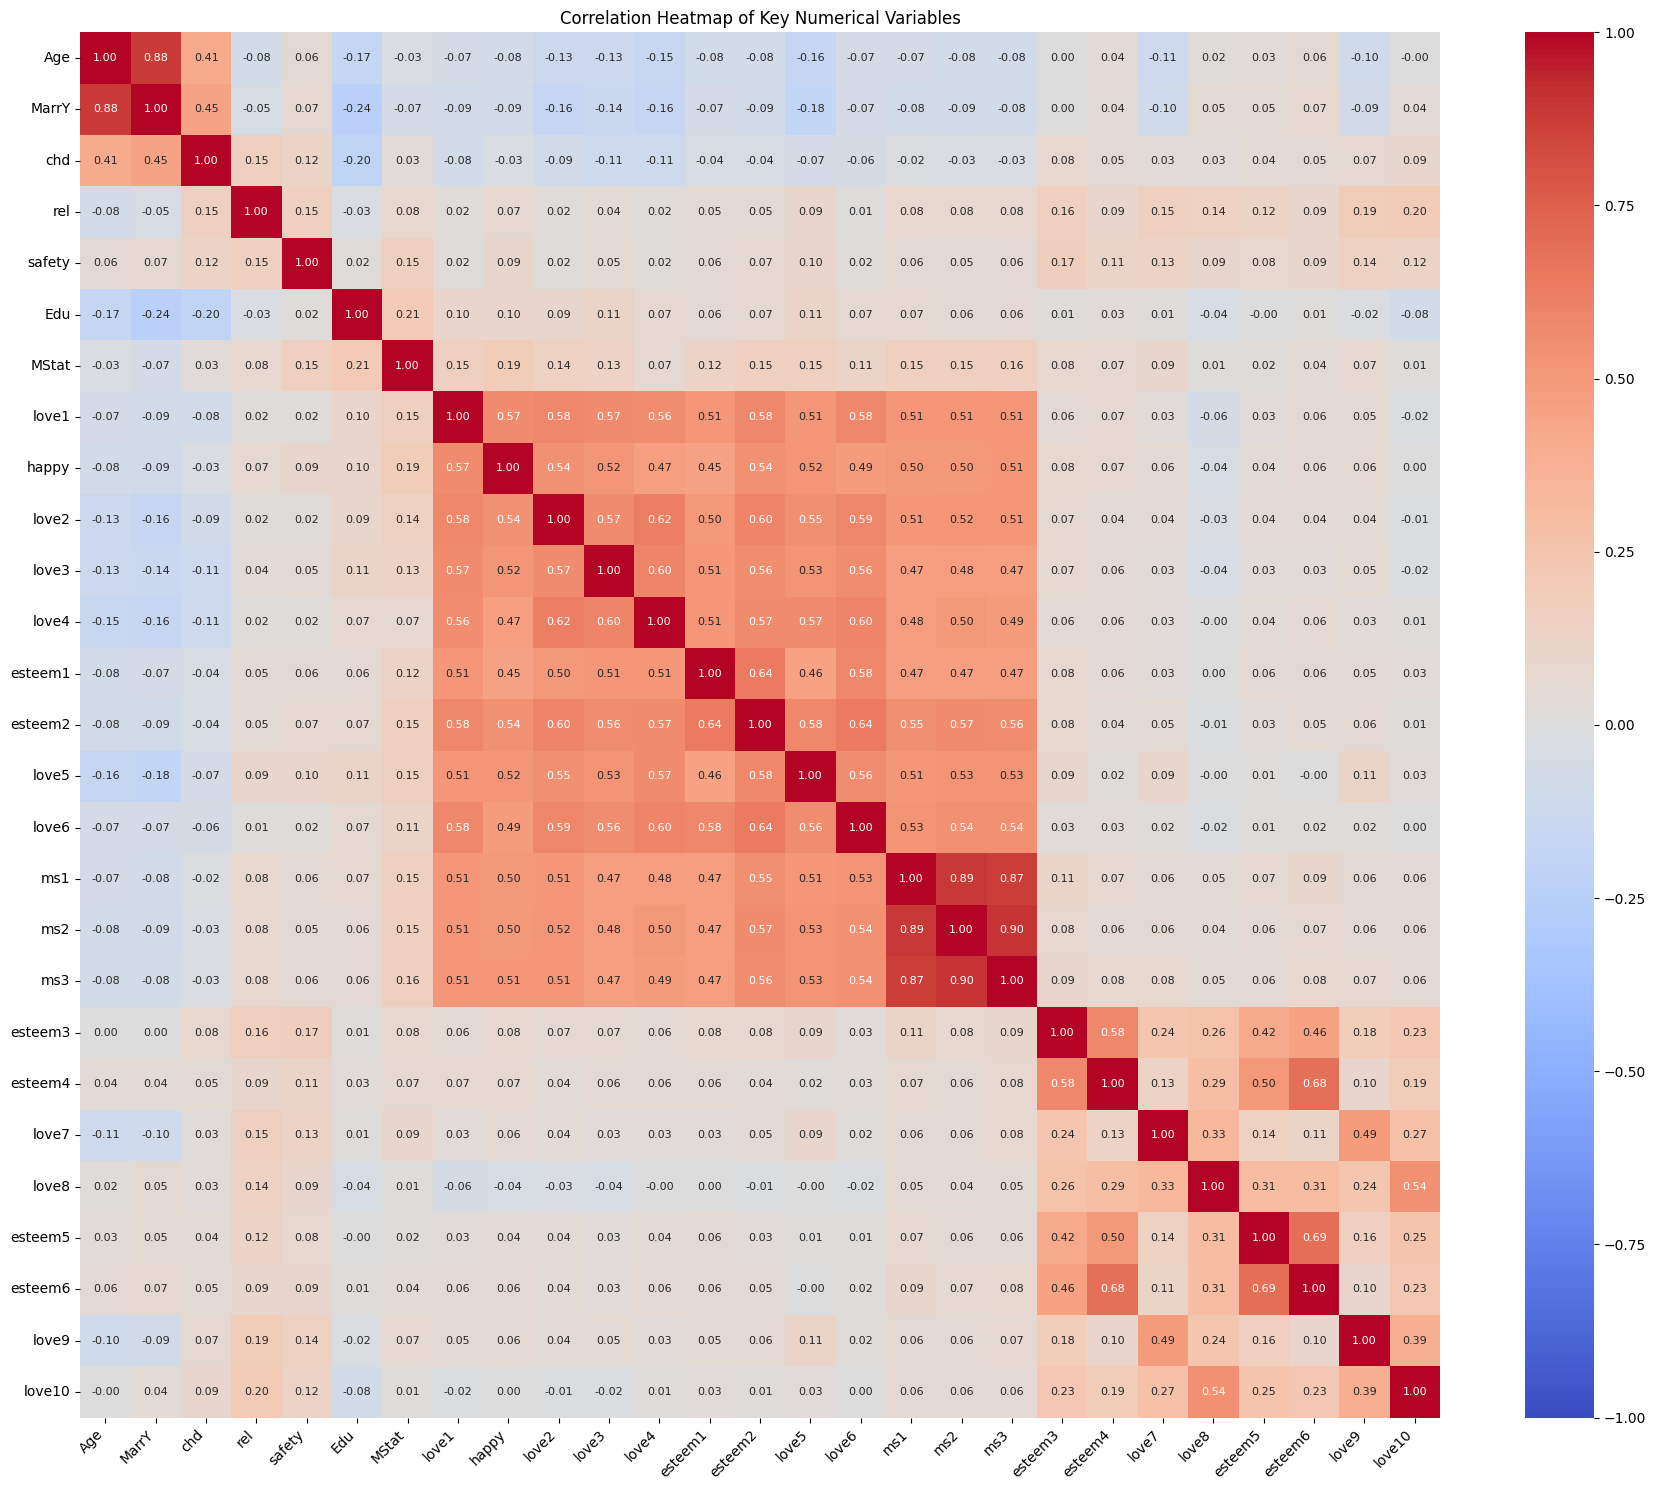


--- Univariate analysis for numerical variables complete. ---


In [12]:
# Step 4.2.1: Calculate and Display Correlation Matrix & Heatmap

# Define your key numerical variables using YOUR short forms
numerical_features_for_corr = [
    'Age', 'MarrY', 'chd', 'rel', 'safety', 'Edu', 'MStat', # Demographics, Religiosity, Pension(Safety)
    'love1', 'happy', 'love2', 'love3', 'love4', 'esteem1', 'esteem2', 'love5', 'love6', # MRQ items
    'ms1', 'ms2', 'ms3', # KMSS items
    'esteem3', 'esteem4', 'love7', 'love8', 'esteem5', 'esteem6', 'love9', 'love10' # CI items
]

# Create a subset DataFrame for correlation
df_corr_subset = df[numerical_features_for_corr].copy()

# Ensure all selected columns are numeric, coercing errors to NaN
for col in df_corr_subset.columns:
    df_corr_subset[col] = pd.to_numeric(df_corr_subset[col], errors='coerce')

# Drop rows with ANY NaNs in this subset to ensure correlation works correctly
df_corr_subset.dropna(inplace=True)

if not df_corr_subset.empty and len(df_corr_subset) > 1: # Min 2 samples for correlation
    correlation_matrix = df_corr_subset.corr().round(2)
    print("\n--- Correlation Matrix of Key Numerical Variables ---")
    # Displaying the full matrix can be large, consider showing parts or just the heatmap
    # For instance, to focus on correlations with Marital statis items:
    print("\nCorrelations of various features with KMSS items (ms1, ms2, ms3):")
    print(correlation_matrix[['ms1', 'ms2', 'ms3']].sort_values(by='ms1', ascending=False))

    
    # Heatmap for visualization
    plt.figure(figsize=(18, 15)) # Adjust size as needed for readability
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0, annot_kws={"size": 8}) # Smaller font for annotations
    plt.title('Correlation Heatmap of Key Numerical Variables')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough valid data to compute a meaningful correlation matrix for the selected features.")





#### 4.2.2. Categorical vs. Numerical: Satisfaction Scores by Demographic Groups

Following the overall correlation analysis, this subsection delves into how marital satisfaction scores (specifically `ms1`, `ms2`, and `ms3`) vary across different demographic and categorical groups. The Python code iterates through several categorical variables (`Sex`, `Edu` - Education Level, `MStat` - Material Status, and `raf` - Religious Affiliation) and, for each, performs the following against the three satisfaction scores:

1.  **Descriptive Statistics per Category**: 
    *   The data is grouped by the categories of the current demographic variable (e.g., by different education levels within `Edu`).
    *   Descriptive statistics (count, mean, std, min, quartiles, max) for each of the three satisfaction scores (`ms1`, `ms2`, `ms3`) are calculated and displayed for each category. This allows for a quantitative comparison of satisfaction levels across groups (e.g., mean `ms1` for males vs. females).

2.  **Box Plots for Visual Comparison**: 
    *   For each satisfaction score (`ms1`, `ms2`, `ms3`), a series of box plots is generated. Each box plot shows the distribution of that satisfaction score for one category of the demographic variable being analyzed (e.g., one box plot for each education level when analyzing `Edu`).
    *   This visual comparison helps in understanding differences in the central tendency, spread, and presence of outliers in satisfaction scores across the different demographic groups.
    *   The `observed=True` parameter is used in `groupby` operations to handle categorical data appropriately, especially if the categories have an inherent order or if some categories might be absent in certain data subsets.
    *   For variables like `Edu` and `MStat`, where categories have a natural order, the plots and statistics are presented in that sorted order.

This detailed breakdown helps to identify if certain demographic groups report systematically different levels of marital satisfaction.

--- Analyzing Satisfaction Scores by Sex ---

--- Descriptive Statistics ---

Combined Statistics Table (ms1, ms2, ms3 by Sex):
        ms1                                                 ms2                                                  ms3                                             
      count      mean      std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max
Sex                                                                                                                                                              
1    3351.0  5.858251  1.36411  1.0  5.0  6.0  7.0  7.0  3351.0  5.900925  1.374513  1.0  5.0  6.0  7.0  7.0  3351.0  5.840943  1.403218  1.0  5.0  6.0  7.0  7.0
2    3827.0  5.634962  1.51806  1.0  5.0  6.0  7.0  7.0  3827.0  5.659263  1.522585  1.0  5.0  6.0  7.0  7.0  3827.0  5.610661  1.562422  1.0  5.0  6.0  7.0  7.0

Individual Statistics:

-- Stats for MS1 by Sex --
      coun

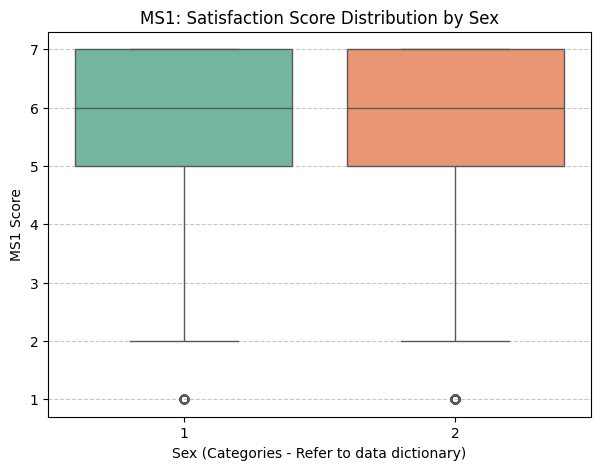

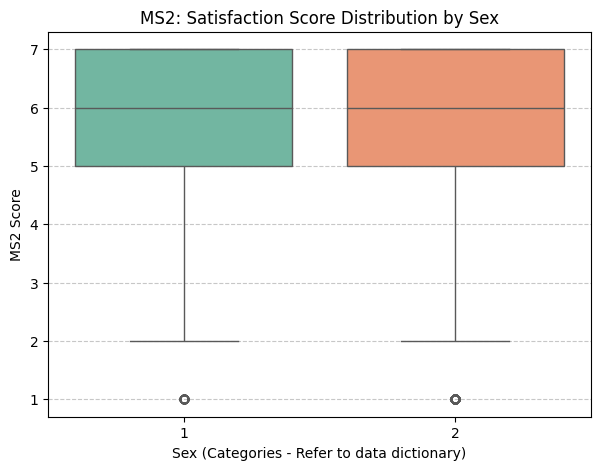

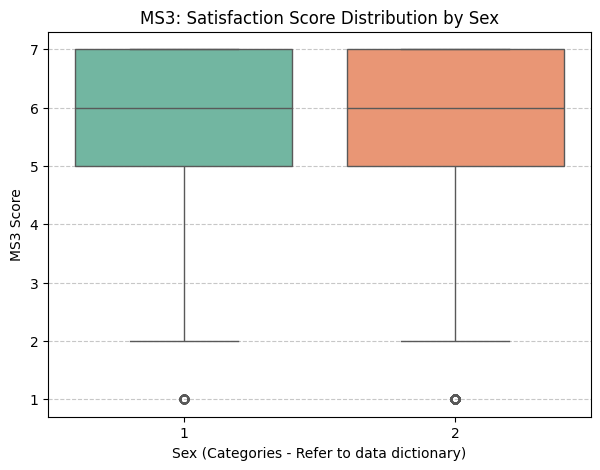


--- Analysis for Sex vs. Satisfaction Scores Complete ---


In [36]:
# Bivariate Analysis: Satisfaction Scores (ms1, ms2, ms3) vs. Sex (Plots and Statistics)
print("--- Analyzing Satisfaction Scores by Sex ---")

satisfaction_vars = ['ms1', 'ms2', 'ms3']

# --- 1. Descriptive Statistics ---
print("\n--- Descriptive Statistics ---")
# Check if 'Sex' column exists
if 'Sex' in df.columns:
    # Group by 'Sex' and calculate descriptive statistics for each satisfaction variable
    # Add observed=True to groupby to silence the FutureWarning and adopt future behavior
    try:
        # Calculate describe() on all satisfaction vars at once
        stats_by_sex_combined = df.groupby('Sex', observed=True)[satisfaction_vars].describe() # Added observed=True
        print("\nCombined Statistics Table (ms1, ms2, ms3 by Sex):")
        print(stats_by_sex_combined)

        # Optionally print individual stats for clarity
        print("\nIndividual Statistics:")
        for var in satisfaction_vars:
            print(f"\n-- Stats for {var.upper()} by Sex --")
            print(df.groupby('Sex', observed=True)[var].describe()) # Added observed=True
            print("-" * 40)

    except Exception as e:
        print(f"Error calculating descriptive statistics: {e}")

else:
    print("Column 'Sex' not found in the DataFrame. Cannot calculate statistics.")


# --- 2. Box Plots ---
print("\n--- Generating Box Plots ---")
# Assuming 'Sex' column exists based on the check above

if 'Sex' in df.columns:
    for var in satisfaction_vars:
        plt.figure(figsize=(7, 5))
        # Note: The observed parameter is primarily for the calculation step (groupby),
        # seaborn's plotting functions typically handle observed categories correctly by default.
        sns.boxplot(x='Sex', y=var, data=df, palette='Set2', hue='Sex', legend=False)
        plt.title(f'{var.upper()}: Satisfaction Score Distribution by Sex')
        plt.xlabel('Sex (Categories - Refer to data dictionary)')
        plt.ylabel(f'{var.upper()} Score')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
else:
     print("Column 'Sex' not found. Cannot generate plots.")


print("\n--- Analysis for Sex vs. Satisfaction Scores Complete ---")



--- Analyzing Satisfaction Scores by Education Level (Edu) ---

--- Descriptive Statistics ---

Combined Statistics Table (ms1, ms2, ms3 by Edu):
        ms1                                                  ms2                                                  ms3                                             
      count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max
Edu                                                                                                                                                               
1      63.0  5.650794  1.416023  1.0  5.0  6.0  7.0  7.0    63.0  5.650794  1.438623  1.0  5.0  6.0  7.0  7.0    63.0  5.444444  1.643931  1.0  4.5  6.0  7.0  7.0
2     358.0  5.544693  1.623346  1.0  5.0  6.0  7.0  7.0   358.0  5.606145  1.610075  1.0  5.0  6.0  7.0  7.0   358.0  5.452514  1.743088  1.0  4.0  6.0  7.0  7.0
3    1124.0  5.641459  1.531651  1.0  5

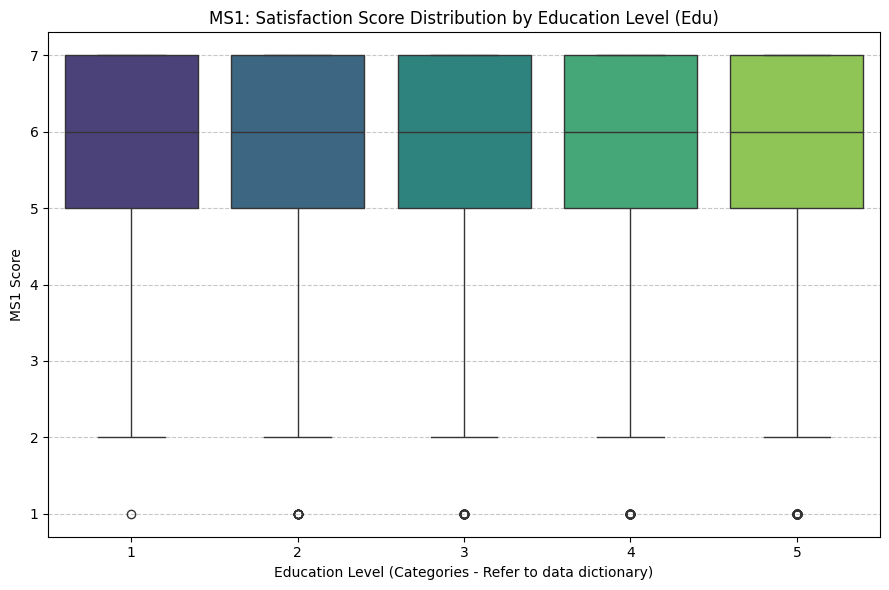

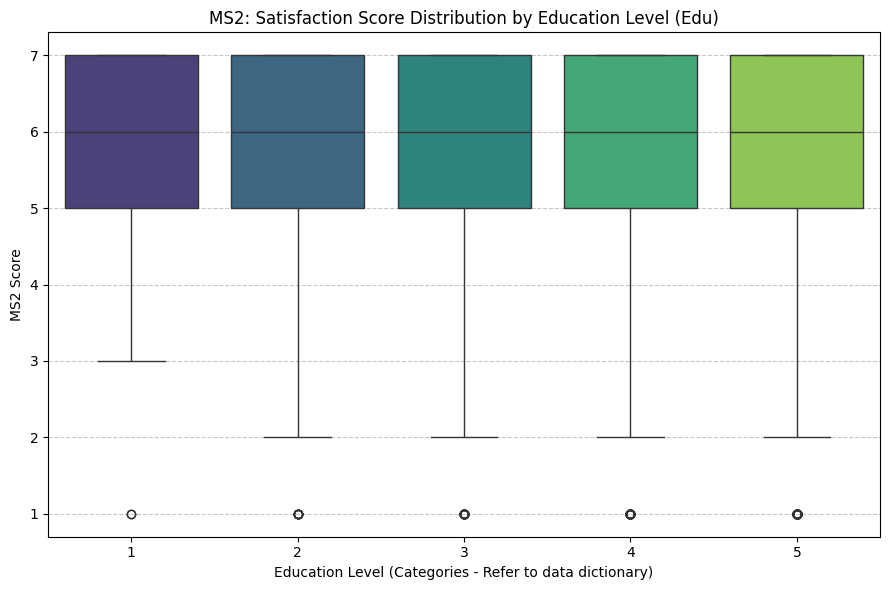

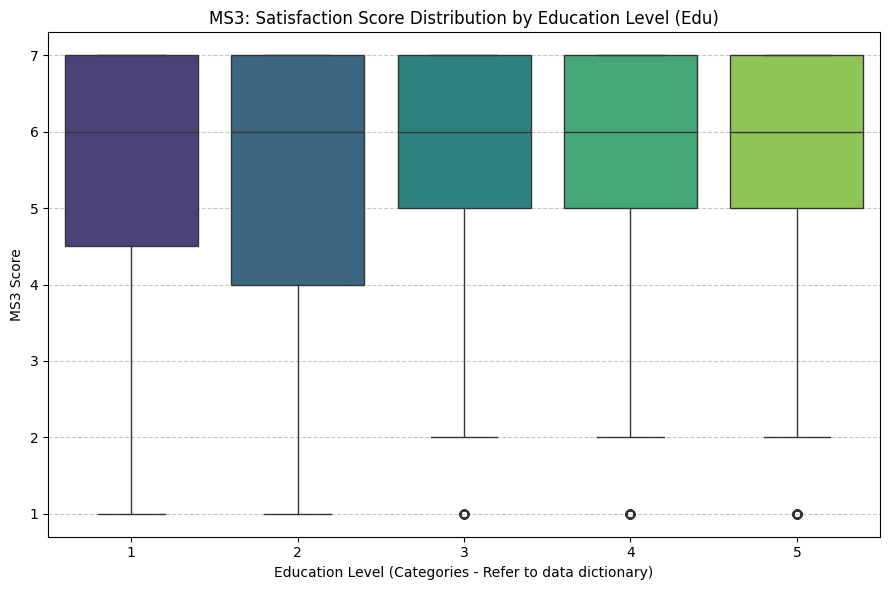


--- Analysis for Edu vs. Satisfaction Scores Complete ---


In [14]:
# Bivariate Analysis: Satisfaction Scores (ms1, ms2, ms3) vs. Edu (Education Level - Plots and Statistics)
print("--- Analyzing Satisfaction Scores by Education Level (Edu) ---")

satisfaction_vars = ['ms1', 'ms2', 'ms3']

# --- 1. Descriptive Statistics ---
print("\n--- Descriptive Statistics ---")
# Check if 'Edu' column exists
if 'Edu' in df.columns:
    # Group by 'Edu' and calculate descriptive statistics for each satisfaction variable
    # Add observed=True to groupby to silence the FutureWarning
    try:
        # Attempt to calculate describe() on all satisfaction vars at once
        # Sorting the Edu categories if they are numerical and have an order
        unique_edu_sorted = sorted(df['Edu'].dropna().unique())
        stats_by_edu_combined = df.groupby('Edu', observed=True)[satisfaction_vars].describe().loc[unique_edu_sorted]
        print("\nCombined Statistics Table (ms1, ms2, ms3 by Edu):")
        print(stats_by_edu_combined)


    except Exception as e:
        print(f"Error calculating descriptive statistics for Edu: {e}")
        print("Ensure 'Edu' column contains categories that can be sorted or remove .loc[unique_edu_sorted] if not applicable.")

else:
    print("Column 'Edu' not found in the DataFrame. Cannot calculate statistics.")


# --- 2. Box Plots ---
print("\n--- Generating Box Plots ---")
# Assuming 'Edu' column exists based on the check above

if 'Edu' in df.columns:
    unique_edu_sorted_plot = sorted(df['Edu'].dropna().unique()) # For consistent plot order
    for var in satisfaction_vars:
        plt.figure(figsize=(9, 6)) # Adjusted figure size for potentially more Edu categories
        sns.boxplot(x='Edu', y=var, data=df, palette='viridis', hue='Edu', legend=False, order=unique_edu_sorted_plot)
        plt.title(f'{var.upper()}: Satisfaction Score Distribution by Education Level (Edu)')
        plt.xlabel('Education Level (Categories - Refer to data dictionary)')
        plt.ylabel(f'{var.upper()} Score')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks() 
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
else:
     print("Column 'Edu' not found. Cannot generate plots.")


print("\n--- Analysis for Edu vs. Satisfaction Scores Complete ---")


--- Analyzing Satisfaction Scores by Material Status (MStat) ---
Reminder: MStat is reverse-coded; higher values indicate better status.

--- Descriptive Statistics ---

Combined Statistics Table (ms1, ms2, ms3 by MStat):
          ms1                                                  ms2                                                  ms3                                             
        count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max
MStat                                                                                                                                                               
1        83.0  4.951807  1.892885  1.0  4.0  5.0  7.0  7.0    83.0  5.036145  1.940868  1.0  4.0  5.0  7.0  7.0    83.0  5.012048  1.928566  1.0  4.0  5.0  7.0  7.0
2       593.0  5.133221  1.793605  1.0  4.0  6.0  7.0  7.0   593.0  5.160202  1.824098  1.0  4.0  6.0  7.0  7.0   593.

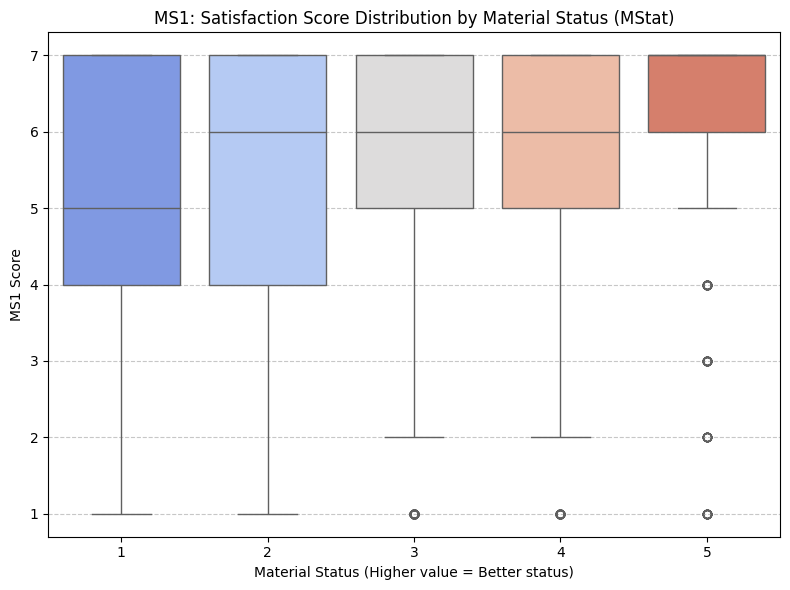

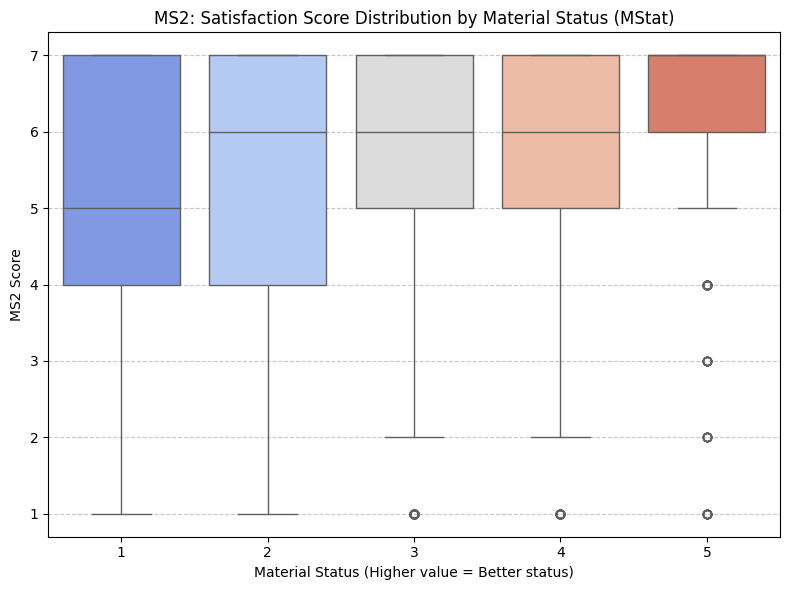

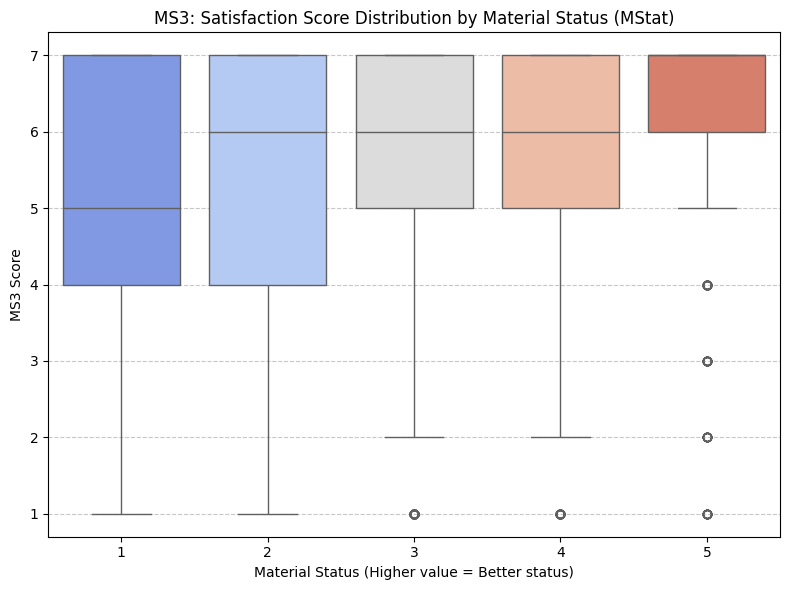


--- Analysis for MStat vs. Satisfaction Scores Complete ---


In [15]:
# Bivariate Analysis: Satisfaction Scores (ms1, ms2, ms3) vs. MStat (Material Status - Plots and Statistics)
print("--- Analyzing Satisfaction Scores by Material Status (MStat) ---")
print("Reminder: MStat is reverse-coded; higher values indicate better status.")

satisfaction_vars = ['ms1', 'ms2', 'ms3']

# --- 1. Descriptive Statistics ---
print("\n--- Descriptive Statistics ---")
# Check if 'MStat' column exists
if 'MStat' in df.columns:
    # Group by 'MStat' and calculate descriptive statistics
    # Add observed=True to groupby
    try:
        # Get sorted unique MStat values for ordering
        unique_mstat_sorted = sorted(df['MStat'].dropna().unique())

        # Calculate describe() on all satisfaction vars at once, ordered by MStat
        stats_by_mstat_combined = df.groupby('MStat', observed=True)[satisfaction_vars].describe().loc[unique_mstat_sorted]
        print("\nCombined Statistics Table (ms1, ms2, ms3 by MStat):")
        print(stats_by_mstat_combined)

        # Optionally print individual stats for clarity
        print("\nIndividual Statistics:")
        for var in satisfaction_vars:
            print(f"\n-- Stats for {var.upper()} by MStat --")
            individual_stats_mstat = df.groupby('MStat', observed=True)[var].describe().loc[unique_mstat_sorted]
            print(individual_stats_mstat)
            print("-" * 40)

    except Exception as e:
        print(f"Error calculating descriptive statistics for MStat: {e}")
        print("Ensure 'MStat' column contains categories that can be sorted or remove .loc[unique_mstat_sorted] if not applicable.")

else:
    print("Column 'MStat' not found in the DataFrame. Cannot calculate statistics.")


# --- 2. Box Plots ---
print("\n--- Generating Box Plots ---")
# Assuming 'MStat' column exists based on the check above

if 'MStat' in df.columns:
    unique_mstat_sorted_plot = sorted(df['MStat'].dropna().unique()) # For consistent plot order
    for var in satisfaction_vars:
        plt.figure(figsize=(8, 6)) # Adjust size if needed
        sns.boxplot(x='MStat', y=var, data=df, palette='coolwarm', hue='MStat', legend=False, order=unique_mstat_sorted_plot)
        plt.title(f'{var.upper()}: Satisfaction Score Distribution by Material Status (MStat)')
        plt.xlabel('Material Status (Higher value = Better status)')
        plt.ylabel(f'{var.upper()} Score')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        # No rotation needed if MStat labels are just numbers 1-5
        plt.tight_layout()
        plt.show()
else:
     print("Column 'MStat' not found. Cannot generate plots.")

print("\n--- Analysis for MStat vs. Satisfaction Scores Complete ---")

--- Analyzing Satisfaction Scores by Relationship Affiliation (raf) ---

--- Descriptive Statistics ---

Combined Statistics Table (ms1, ms2, ms3 by raf):
        ms1                                                   ms2                                                  ms3                                             
      count      mean       std  min   25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max   count      mean       std  min  25%  50%  75%  max
raf                                                                                                                                                                
1     925.0  5.911351  1.489767  1.0  5.00  6.0  7.0  7.0   925.0  5.934054  1.472319  1.0  6.0  6.0  7.0  7.0   925.0  5.859459  1.508895  1.0  5.0  6.0  7.0  7.0
2    2582.0  5.677382  1.463790  1.0  5.00  6.0  7.0  7.0  2582.0  5.718823  1.462943  1.0  5.0  6.0  7.0  7.0  2582.0  5.686290  1.481893  1.0  5.0  6.0  7.0  7.0
3      38.0  5.578947  1.

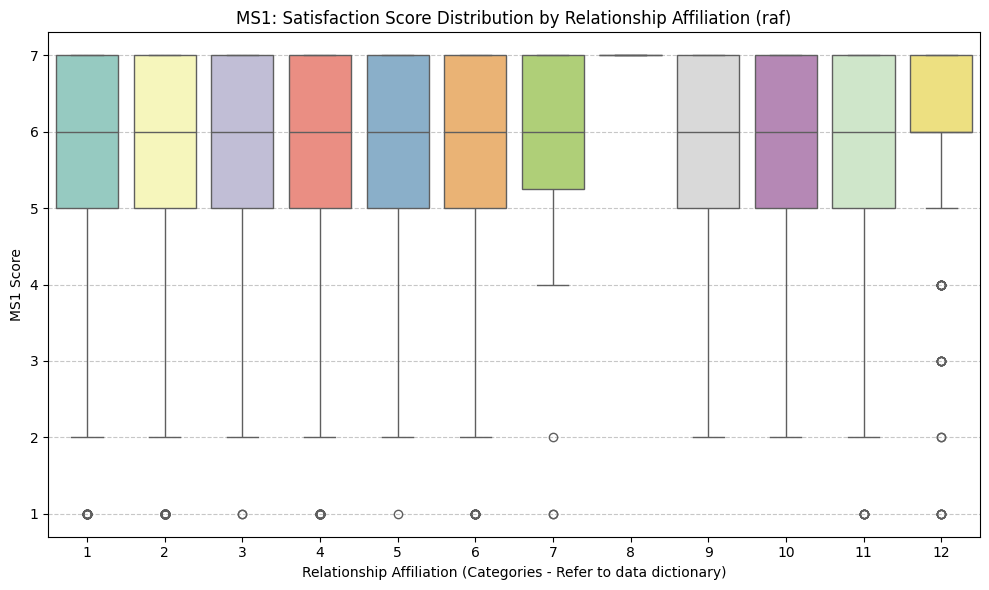

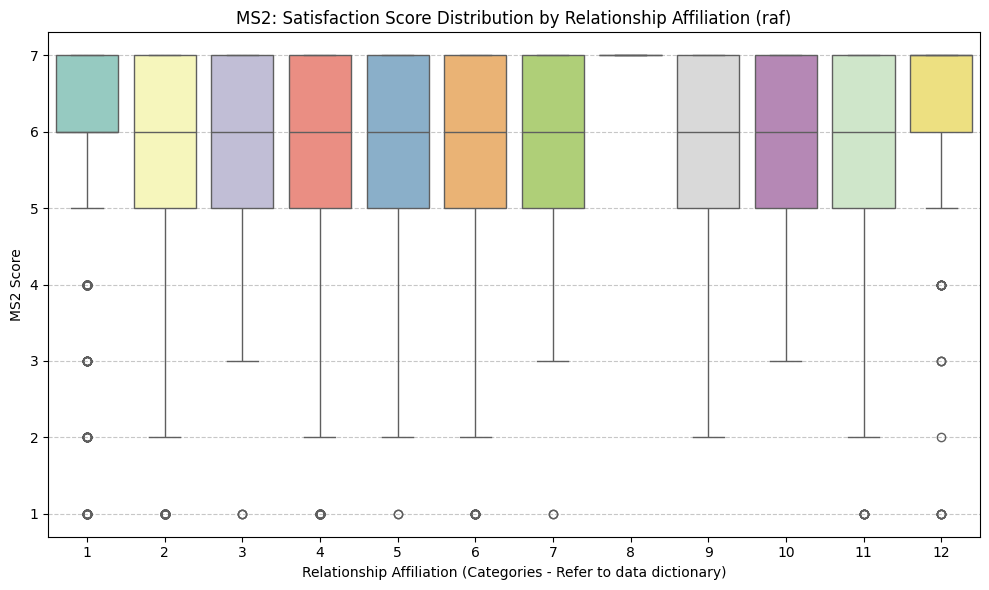

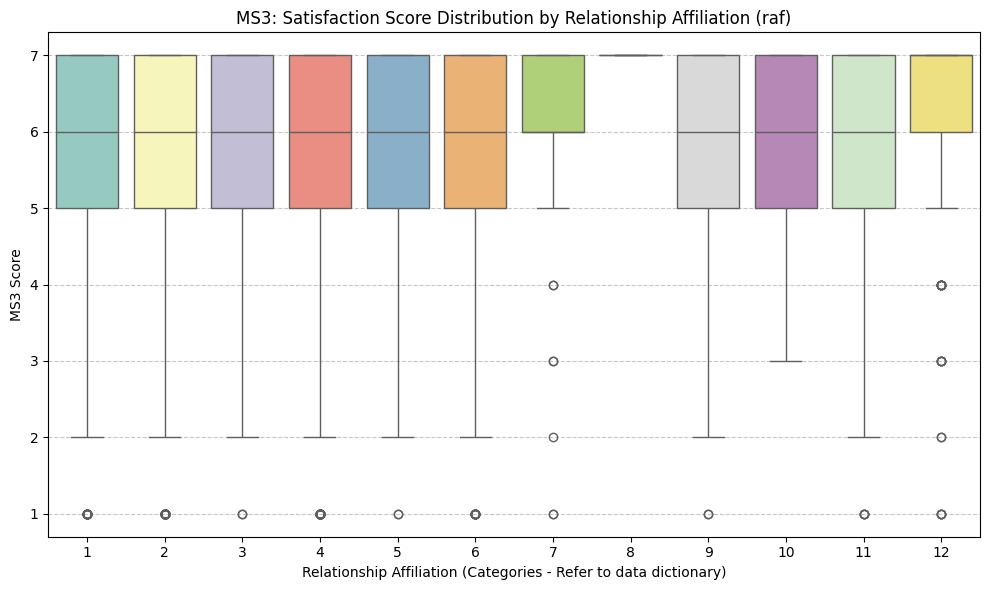


--- Analysis for raf vs. Satisfaction Scores Complete ---


In [16]:
# Bivariate Analysis: Satisfaction Scores (ms1, ms2, ms3) vs. raf (Relationship Affiliation - Plots and Statistics)
print("--- Analyzing Satisfaction Scores by Relationship Affiliation (raf) ---")

satisfaction_vars = ['ms1', 'ms2', 'ms3']

# --- 1. Descriptive Statistics ---
print("\n--- Descriptive Statistics ---")
# Check if 'raf' column exists
if 'raf' in df.columns:
    # Group by 'raf' and calculate descriptive statistics
    # Add observed=True to groupby
    try:
        # Get unique raf values - sorting might be useful if numerically coded, otherwise default order is fine
        unique_raf_sorted = sorted(df['raf'].dropna().unique())

        # Calculate describe() on all satisfaction vars at once, ordered by raf if sorted
        stats_by_raf_combined = df.groupby('raf', observed=True)[satisfaction_vars].describe().loc[unique_raf_sorted]
        print("\nCombined Statistics Table (ms1, ms2, ms3 by raf):")
        print(stats_by_raf_combined)

        # Optionally print individual stats for clarity
        print("\nIndividual Statistics:")
        for var in satisfaction_vars:
            print(f"\n-- Stats for {var.upper()} by raf --")
            individual_stats_raf = df.groupby('raf', observed=True)[var].describe().loc[unique_raf_sorted]
            print(individual_stats_raf)
            print("-" * 40)

    except KeyError as ke:
         print(f"KeyError during statistics calculation for raf: {ke}")
         print("This might happen if sorting keys (unique_raf_sorted) don't match group keys.")
         print("Trying without explicit sorting:")
         try:
            stats_by_raf_combined_unsorted = df.groupby('raf', observed=True)[satisfaction_vars].describe()
            print("\nCombined Statistics Table (Unsorted):")
            print(stats_by_raf_combined_unsorted)
         except Exception as e_inner:
             print(f"Error calculating unsorted descriptive statistics for raf: {e_inner}")

    except Exception as e:
        print(f"General error calculating descriptive statistics for raf: {e}")


else:
    print("Column 'raf' not found in the DataFrame. Cannot calculate statistics.")


# --- 2. Box Plots ---
print("\n--- Generating Box Plots ---")
# Assuming 'raf' column exists based on the check above

if 'raf' in df.columns:
    # Use the sorted order for consistency if it worked for stats, otherwise default order
    try:
        plot_order_raf = sorted(df['raf'].dropna().unique())
    except:
        plot_order_raf = None # Let seaborn decide if sorting fails

    for var in satisfaction_vars:
        plt.figure(figsize=(10, 6)) # Adjust size - raf might have several categories
        sns.boxplot(x='raf', y=var, data=df, palette='Set3', hue='raf', legend=False, order=plot_order_raf)
        plt.title(f'{var.upper()}: Satisfaction Score Distribution by Relationship Affiliation (raf)')
        plt.xlabel('Relationship Affiliation (Categories - Refer to data dictionary)')
        plt.ylabel(f'{var.upper()} Score')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks() 
        plt.tight_layout()
        plt.show()
else:
     print("Column 'raf' not found. Cannot generate plots.")


print("\n--- Analysis for raf vs. Satisfaction Scores Complete ---")



#### 4.2.3. Numerical vs. Numerical: Scatter Plots for Exploratory Question Components

To directly investigate the relationships pertinent to our specific exploratory questions, this subsection focuses on creating scatter plots. The Python code defines `ms2` (satisfaction with spouse as a partner) as the primary outcome variable. It then iterates through pairs of predictor variables identified in each of the four exploratory questions:

*   **Question 1**: `love6` (loving their spouse) and `love5` (relationship has a romantic side).
*   **Question 2**: `esteem1` (respecting spouse) and `esteem2` (feeling proud of spouse).
*   **Question 3**: `love2` (finding spouse attractive) and `happy` (happiness with spouse).
*   **Question 4**: `love9` (aging parents should live at home) and `love10` (children live at home until married).

For each individual predictor variable in these pairs, the code generates a scatter plot against the `ms2` outcome variable:

1.  **`seaborn.regplot`**: This function is used to create the scatter plot and also fits and plots a linear regression model relating the predictor to the outcome.
2.  **Jitter**: `x_jitter=True` and `y_jitter=True` are applied. Since many of the predictor variables are on discrete scales (e.g., 1-5 or 1-7), jitter adds a small amount of random noise to the data points. This helps to prevent overplotting (where many points fall on the exact same coordinates), making it easier to visualize the density and distribution of points.
3.  **Styling**: Points are made semi-transparent (`alpha=0.3`) and smaller (`s=25`) for better visualization of density. The regression line is colored distinctly (e.g., red, blue, green, purple for different sets of predictors).
4.  **Labels and Grid**: Appropriate titles and axis labels are added, along with a grid for easier reading.

These plots provide a visual assessment of the strength and direction of the relationship between each key predictor and marital satisfaction (`ms2`), helping to see if, for example, higher scores on `love6` tend to be associated with higher scores on `ms2`.




In [ ]:
outcome_variable = 'ms2' 

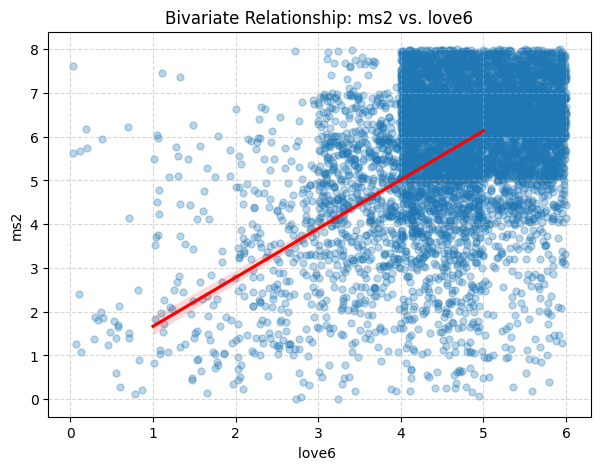

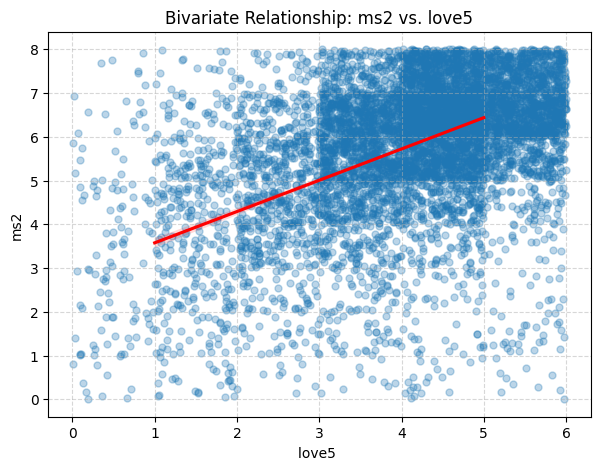

In [18]:
# For Exploratory Question 1 components
predictors_q1 = ['love6', 'love5']
for predictor in predictors_q1:
    plt.figure(figsize=(7, 5))

    sns.regplot(x=predictor, y=outcome_variable, data=df, 
                scatter_kws={'alpha':0.3, 's':25}, line_kws={'color':'red'},x_jitter=True, y_jitter=True)
    plt.title(f'Bivariate Relationship: {outcome_variable} vs. {predictor}')
    plt.xlabel(f'{predictor} ')
    plt.ylabel(outcome_variable)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

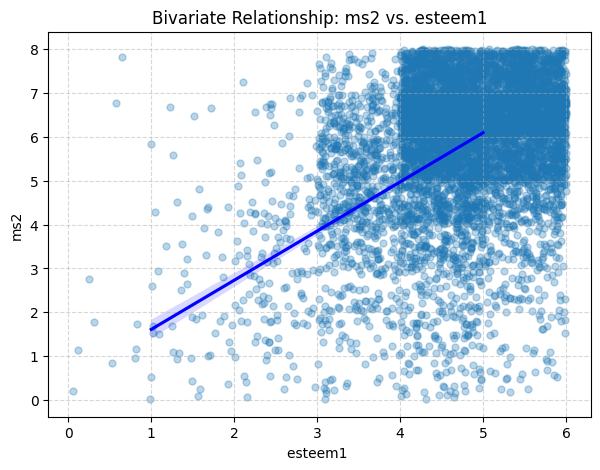

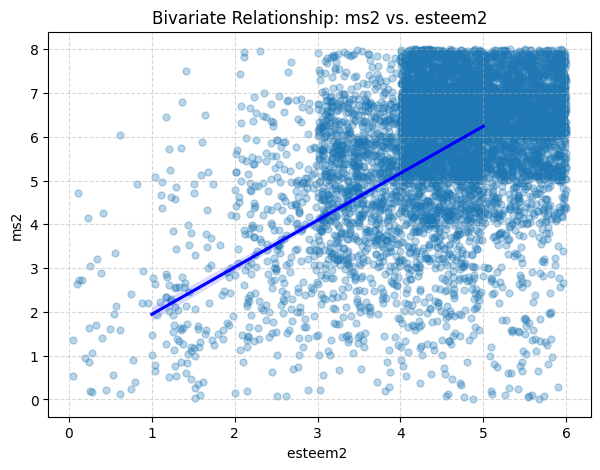

In [19]:
# For Exploratory Question 2 components
predictors_q2 = ['esteem1', 'esteem2']
for predictor in predictors_q2:
    plt.figure(figsize=(7, 5))
    sns.regplot(x=predictor, y=outcome_variable, data=df,
                scatter_kws={'alpha':0.3, 's':25}, line_kws={'color':'blue'},x_jitter=True, y_jitter=True)
    plt.title(f'Bivariate Relationship: {outcome_variable} vs. {predictor}')
    plt.xlabel(f'{predictor} ')
    plt.ylabel(outcome_variable)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

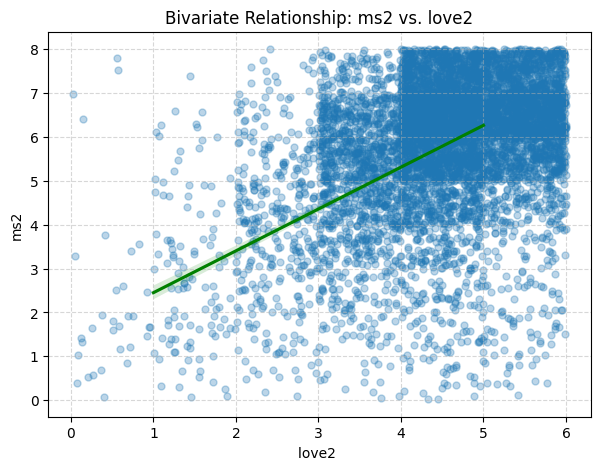

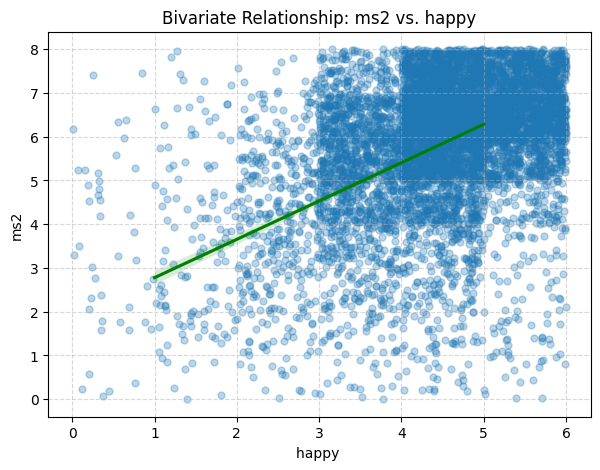

In [20]:
# For Exploratory Question 3 components
predictors_q3 = ['love2', 'happy']
for predictor in predictors_q3:
    plt.figure(figsize=(7, 5))
    sns.regplot(x=predictor, y=outcome_variable, data=df,
                scatter_kws={'alpha':0.3, 's':25}, line_kws={'color':'green'}, x_jitter=True, y_jitter=True)
    plt.title(f'Bivariate Relationship: {outcome_variable} vs. {predictor}')
    plt.xlabel(f'{predictor} ')
    plt.ylabel(outcome_variable)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

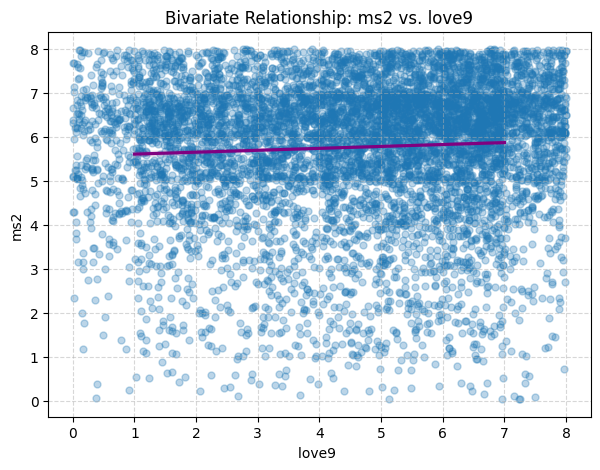

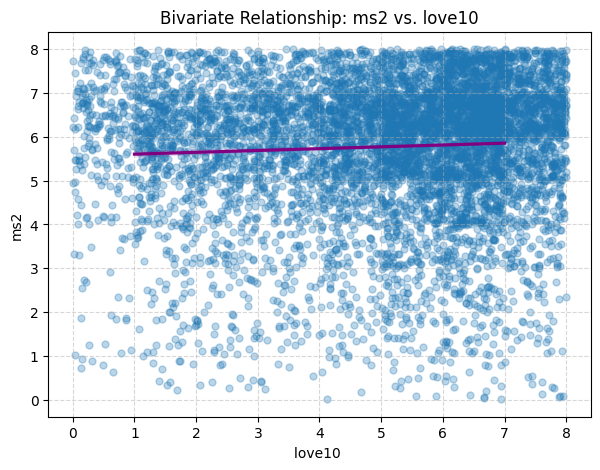

In [23]:
# For Exploratory Question 4 components 
predictors_q4 = ['love9', 'love10']
for predictor in predictors_q4:
    plt.figure(figsize=(7, 5))
    sns.regplot(x=predictor, y=outcome_variable, data=df,
                scatter_kws={'alpha':0.3, 's':25}, line_kws={'color':'purple'}, x_jitter=True, y_jitter=True)
    plt.title(f'Bivariate Relationship: {outcome_variable} vs. {predictor}')
    plt.xlabel(f'{predictor} ')
    plt.ylabel(outcome_variable)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

## 4.3 Multivariate Visualizations (Focused on Exploratory Questions - Grouped Box Plots):
To explore potential interaction effects related to our exploratory questions, we will use grouped box plots (via `seaborn.catplot`). This allows for a more nuanced understanding of how combinations of predictors relate to marital satisfaction.

--- Generating Multivariate Box Plots for Exploratory Questions (Improved Readability) ---


--- Exploratory Question 1: 'love6' and 'love5' ---


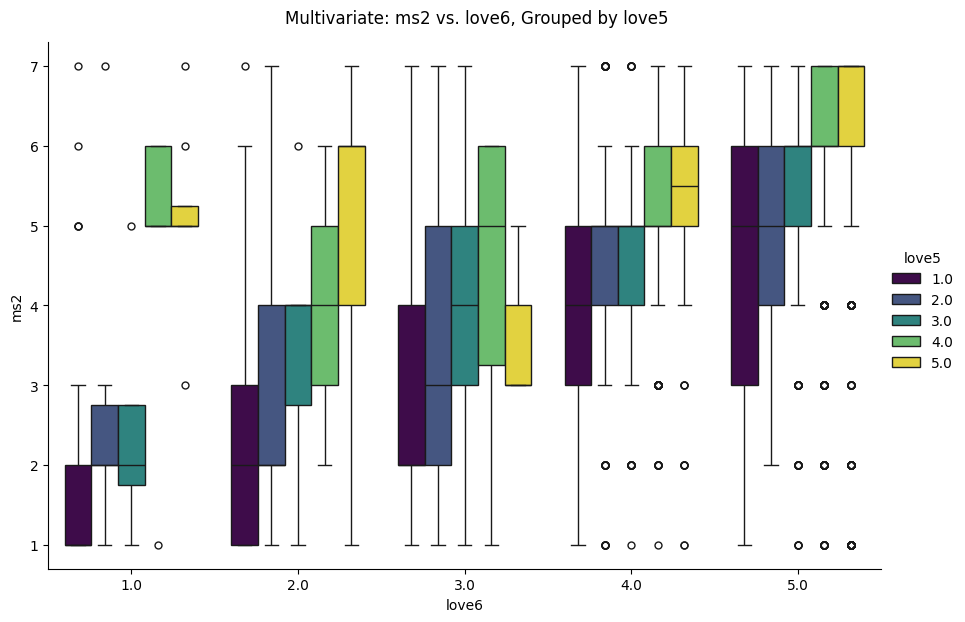

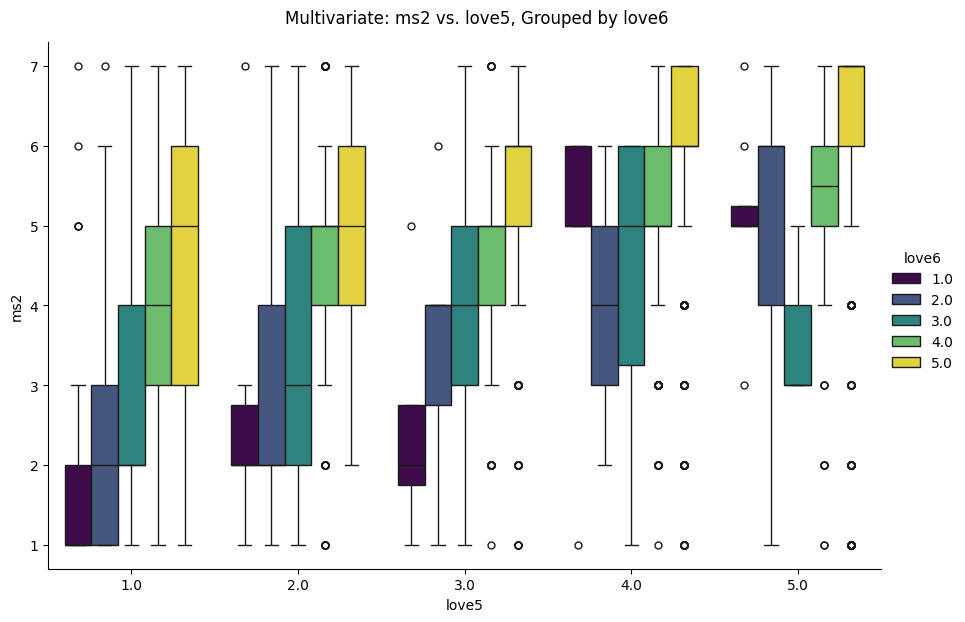



--- Exploratory Question 2: 'esteem1' and 'esteem2' ---


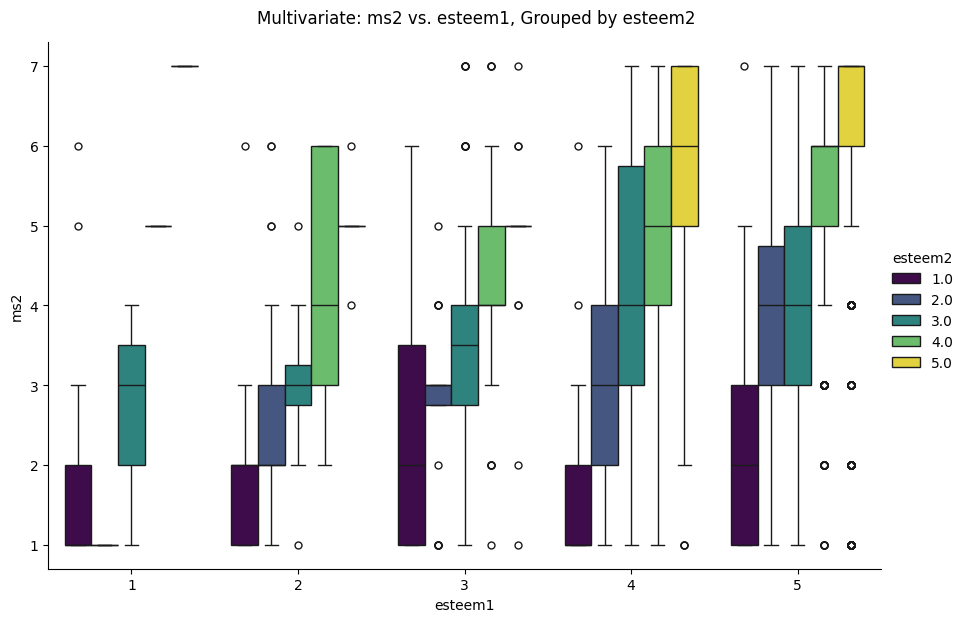

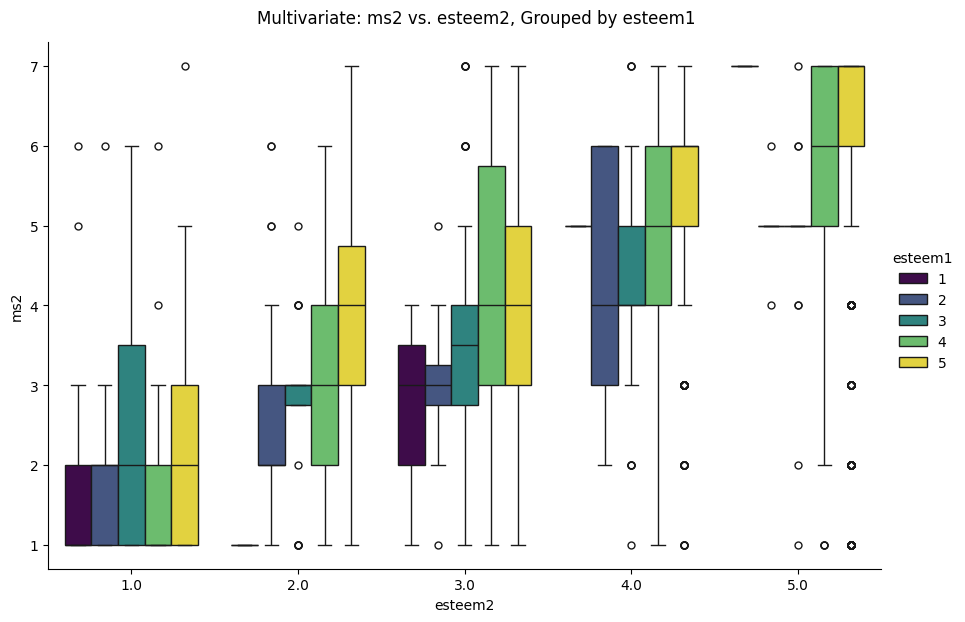



--- Exploratory Question 3: 'love2' and 'happy' ---


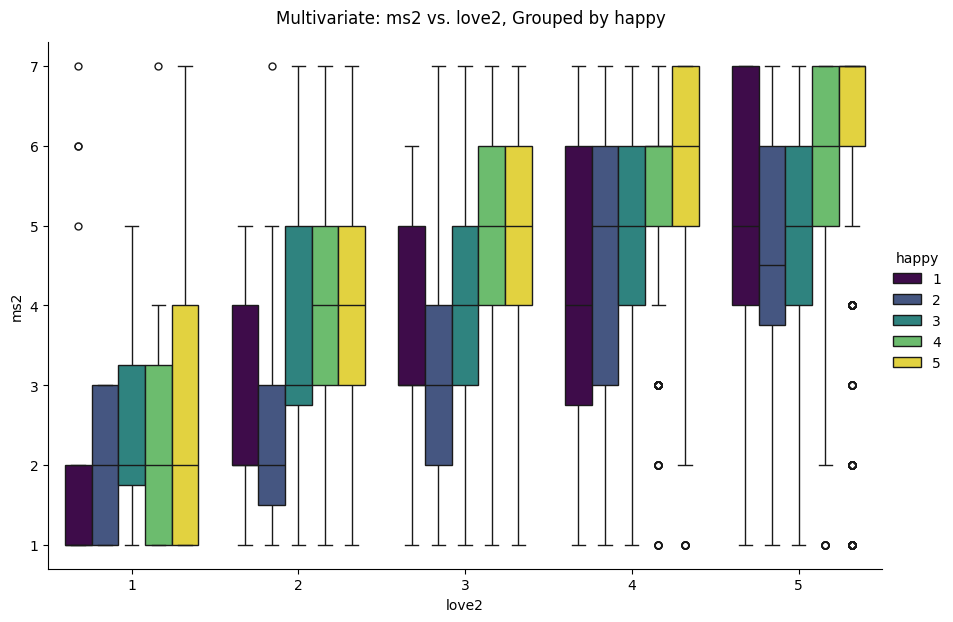

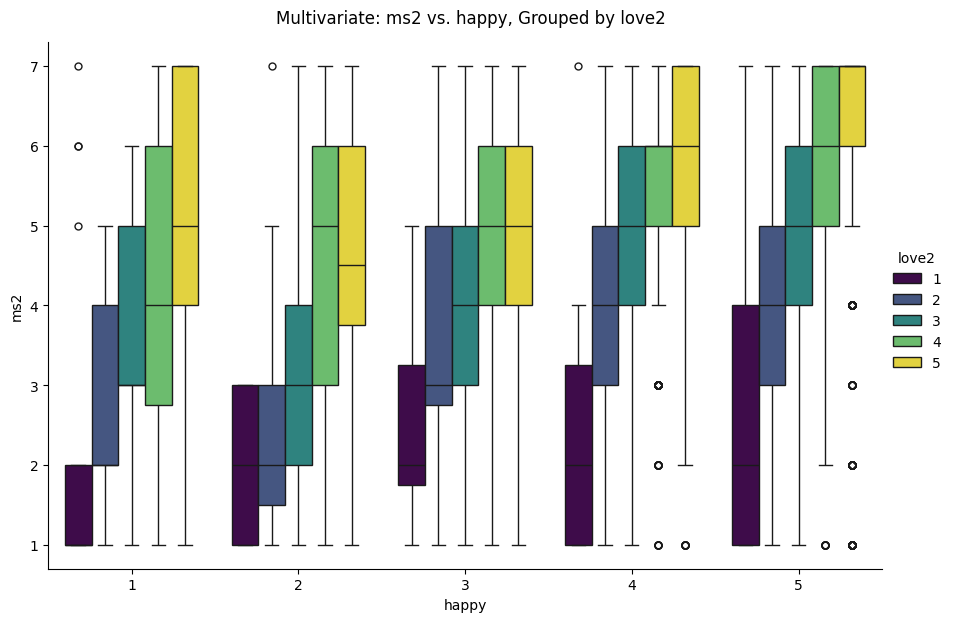



--- Exploratory Question 4: 'love9' and 'love10' ---


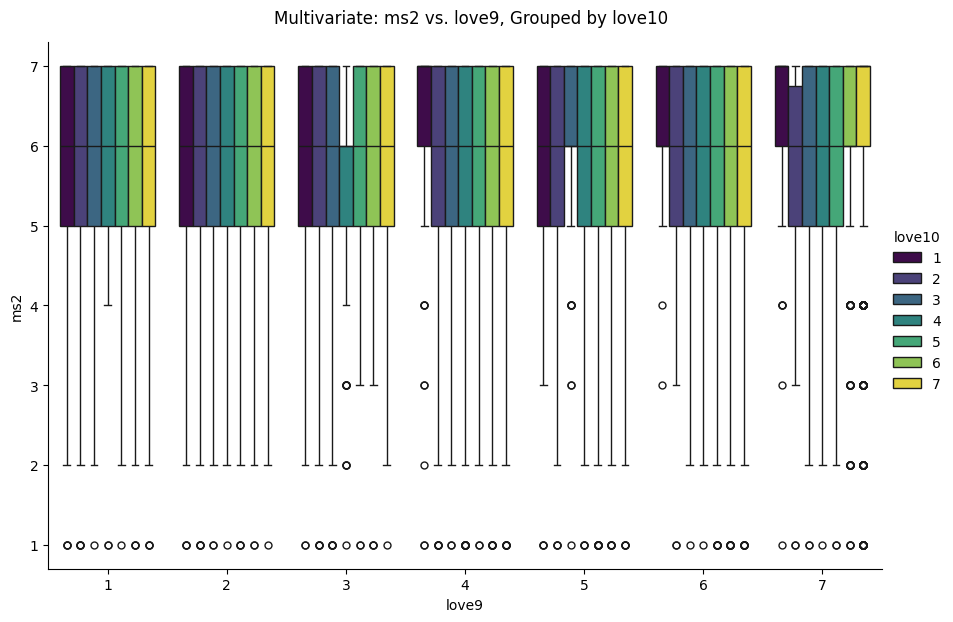

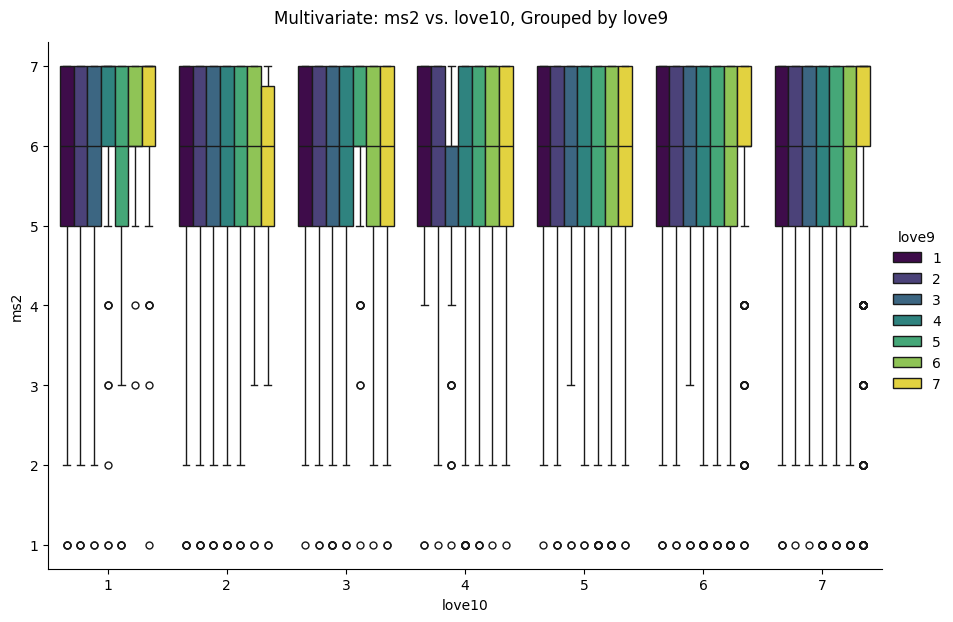


--- Multivariate box plot generation complete. ---


In [22]:
outcome_variable = 'ms2'
# Define the sets of predictors for each exploratory question
exploratory_questions_predictors = [
    ("Exploratory Question 1: 'love6' and 'love5'", 'love6', 'love5'),
    ("Exploratory Question 2: 'esteem1' and 'esteem2'", 'esteem1', 'esteem2'),
    ("Exploratory Question 3: 'love2' and 'happy'", 'love2', 'happy'),
    ("Exploratory Question 4: 'love9' and 'love10'", 'love9', 'love10')
]

print("--- Generating Multivariate Box Plots for Exploratory Questions (Improved Readability) ---")

# Check if df and outcome_variable are defined to prevent errors
if 'df' not in locals() or df is None:
    print("Error: DataFrame 'df' is not defined. Please load your data.")
elif 'outcome_variable' not in locals() or outcome_variable is None:
    print("Error: 'outcome_variable' is not defined.")
else:
    for q_title, p1, p2 in exploratory_questions_predictors:
        # Check if predictor columns exist in df
        if not {p1, p2, outcome_variable}.issubset(df.columns):
            print(f"\n--- Skipping {q_title} ---")
            print(f"One or more columns ({p1}, {p2}, {outcome_variable}) not found in DataFrame.")
            continue

        print(f"\n\n--- {q_title} ---")

        # Plot 1: outcome_variable vs. p1, grouped by p2
        # Using catplot with kind="box"
        g = sns.catplot(x=p1, y=outcome_variable, hue=p2, data=df,
                        kind="box", palette='viridis', height=6, aspect=1.5, legend_out=True)
        g.fig.suptitle(f'Multivariate: {outcome_variable} vs. {p1}, Grouped by {p2}', y=1.03) # Adjust title position
        g.set_axis_labels(f'{p1}', f'{outcome_variable}')
        # plt.grid(True, linestyle='--', alpha=0.5) # catplot handles grid differently, often not needed or add per Axes
        plt.show()

        # Plot 2: outcome_variable vs. p2, grouped by p1
        # Using catplot with kind="box"
        g = sns.catplot(x=p2, y=outcome_variable, hue=p1, data=df,
                        kind="box", palette='viridis', height=6, aspect=1.5, legend_out=True)
        g.fig.suptitle(f'Multivariate: {outcome_variable} vs. {p2}, Grouped by {p1}', y=1.03) # Adjust title position
        g.set_axis_labels(f'{p2}', f'{outcome_variable}')
        # plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

    print("\n--- Multivariate box plot generation complete. ---")


## 5. Feature Engineering and Transformation for Association Rule Mining

Following the Exploratory Data Analysis (EDA), this section details the crucial steps of feature engineering and data transformation specifically tailored for association rule mining (ARM). The primary goal here is to convert our cleaned dataset into a format suitable for the Apriori algorithm, which typically requires a transactional dataset where each transaction consists of a set of binary items.

Our feature engineering process is guided by the exploratory questions defined at the beginning of this project. We will focus on transforming the key variables identified in these questions into a binary categorical format (e.g., "High" vs. "Low", "High_Satisfaction" vs. "Low_Satisfaction").

The key steps in this section are:

1.  **Selection of Key Variables:** We will create a working copy of the cleaned dataset (`df_arm`) and select only the variables directly relevant to our four exploratory questions. This includes:
    *   The primary outcome variable: `ms2` (satisfaction with spouse as a partner).
    *   Predictor variables for Question 1: `love6` (loving their spouse) and `love5` (relationship has a romantic side).
    *   Predictor variables for Question 2: `esteem1` (respecting spouse) and `esteem2` (feeling proud of spouse).
    *   Predictor variables for Question 3: `love2` (finding spouse attractive) and `happy` (happiness with spouse).
    *   Predictor variables for Question 4: `love9` (aging parents should live at home with children) and `love10` (children should live at home until married).

2.  **Binarization of Selected Variables:** Each selected variable will be converted into a binary categorical format. The thresholds for this binarization are determined based on the distribution of each variable observed during EDA and the nature of the scales:
    *   **High Threshold Items (`love6`, `esteem1`, `esteem2`):** For these MRQ items, which are on a 1-5 scale and often skewed towards the higher end, a score of `5` will be categorized as "High," and scores below `5` will be "Low." This reflects a strong endorsement of the positive aspect.
    *   **Medium Threshold Items (`love5`, `love2`, `happy`):** For these MRQ items (1-5 scale) that might have a more balanced distribution or where a slightly less extreme positive response is still meaningful, scores of `4` or `5` will be categorized as "High," and scores below `4` as "Low."
    *   **Collectivism Inventory Items (`love9`, `love10`):** These items are on a 1-7 scale. Based on their distributions and the desire to capture strong agreement, scores of `5` or above (i.e., 5, 6, or 7) will be categorized as "High," and scores below `5` as "Low."
    *   **Marital Satisfaction Outcome (`ms2`):** This KMSS item is on a 1-7 scale. To identify individuals with clearly high satisfaction, scores of `6` or `7` will be categorized as "High_Satisfaction," and scores below `6` as "Low_Satisfaction."

3.  **Handling Missing Values:** After binarization, any rows containing missing values (`NaN`) in the selected binary columns will be dropped. This is necessary because the Apriori algorithm cannot directly handle missing data.

4.  **Creation of Transactional Dataset (One-Hot Encoding):** The final step is to transform the dataset of binary categorical variables into a transactional format suitable for the `mlxtend.frequent_patterns.apriori` function. This is achieved through one-hot encoding. For each original variable (e.g., `love6`), two new binary columns will be created (e.g., `love6_High`, `love6_Low`). A `1` in `love6_High` indicates the original `love6` was categorized as "High," and `0` otherwise. This process results in a wide-format DataFrame where each row is a transaction, and each column represents a unique item (e.g., `love6_High`, `ms2_High_Satisfaction`).

The Python code cell immediately following this markdown will implement these transformation steps, preparing `df_transactions` for the association rule mining phase.





In [31]:
# Step 5: Focused Feature Engineering for Exploratory Questions

# Create a clean working copy for ARM
df_arm = df.copy()

# --- 1. Select key variables for exploratory questions ---
exploratory_vars = {
    'outcome': ['ms2'],  # Satisfaction with spouse as partner
    'question1': ['love6', 'love5'],  # Loving spouse, romantic side
    'question2': ['esteem1', 'esteem2'],  # Respect and pride in spouse
    'question3': ['love2', 'happy'],  # Attraction and happiness
    'question4': ['love9', 'love10']  # Collectivistic values
}

# Flatten list for processing
all_vars = []
for vars in exploratory_vars.values():
    all_vars.extend(vars)

# Verify all variables exist in the dataset
missing_vars = [var for var in all_vars if var not in df_arm.columns]
if missing_vars:
    print(f"Warning: The following variables were not found: {missing_vars}")
else:
    print(f"All {len(all_vars)} required variables are present in the dataset.")

# --- 2. Creating binary categorical variables ---
# Variables that need level 5 to be "High" (strongly skewed to 5)
high_threshold_items = ['love6', 'esteem1', 'esteem2']
for col in high_threshold_items:
    if col in df_arm.columns:
        df_arm[col] = np.where(df_arm[col] >= 5, 'High', 'Low')

# Variables where 4-5 can be "High" (more balanced distributions)
medium_threshold_items = ['love5', 'love2', 'happy'] 
for col in medium_threshold_items:
    if col in df_arm.columns:
        df_arm[col] = np.where(df_arm[col] >= 4, 'High', 'Low')

# CI items (1-7 scale)
ci_items = ['love9', 'love10']
for col in ci_items:
    if col in df_arm.columns:
        df_arm[col] = np.where(df_arm[col] >= 5, 'High', 'Low')

# Marital satisfaction (ms2) - use 6-7 as "High"
if 'ms2' in df_arm.columns:
    df_arm['ms2'] = np.where(df_arm['ms2'] >= 6, 'High_Satisfaction', 'Low_Satisfaction')

# --- 3. Preparing dataset for association rule mining ---
# Create a dataset with just the binary columns
df_arm_binary = df_arm[all_vars].copy()

# Check for missing values
missing_in_binary = df_arm_binary.isnull().sum()
if missing_in_binary.sum() > 0:
    print("Missing values found in binary columns:")
    print(missing_in_binary[missing_in_binary > 0])
    
    # Handle missing values
    rows_before = len(df_arm_binary)
    df_arm_binary = df_arm_binary.dropna()
    rows_after = len(df_arm_binary)
    print(f"Dropped {rows_before - rows_after} rows with missing values")
else:
    print("No missing values in binary columns - all good!")

# --- 4. Create transactional dataset for Apriori ---
# One-hot encode the binary variables
df_transactions = pd.get_dummies(df_arm_binary)

print(f"\nFinal dataset shapes:")
print(f"Binary dataset: {df_arm_binary.shape}")
print (f"First few rows of the binary dataset:\n{df_arm_binary.head()}")
print(f"Transactional dataset: {df_transactions.shape}")
print (f"First few rows of the transactional dataset:\n{df_transactions.head()}")



All 9 required variables are present in the dataset.
No missing values in binary columns - all good!

Final dataset shapes:
Binary dataset: (7178, 9)
First few rows of the binary dataset:
                 ms2 love6 love5 esteem1 esteem2 love2 happy love9 love10
0  High_Satisfaction  High  High     Low    High  High  High  High   High
1  High_Satisfaction  High  High    High    High  High  High  High   High
2  High_Satisfaction  High   Low    High    High  High  High  High   High
3  High_Satisfaction  High  High    High     Low  High  High  High   High
4  High_Satisfaction  High  High    High    High  High  High  High   High
Transactional dataset: (7178, 18)
First few rows of the transactional dataset:
   ms2_High_Satisfaction  ms2_Low_Satisfaction  love6_High  love6_Low  love5_High  love5_Low  esteem1_High  esteem1_Low  esteem2_High  esteem2_Low  love2_High  love2_Low  happy_High  happy_Low  love9_High  love9_Low  love10_High  love10_Low
0                   True                 False  

## 6. Association Rule Mining

This section focuses on applying Association Rule Mining (ARM) to the preprocessed and feature-engineered dataset. The goal is to uncover interesting relationships and patterns between different attributes and how they might relate to marital satisfaction. We will use the Apriori algorithm to find frequent itemsets and then generate association rules from these itemsets. Finally, we will filter these rules to identify those most relevant to our research questions and visualize them for better understanding.



### 6.1 Apply Apriori Algorithm to Find Frequent Itemsets

The first step in ARM is to identify frequent itemsets within the data. An itemset is considered frequent if its support (the proportion of transactions in the dataset that contain the itemset) is above a predefined minimum support threshold. The Apriori algorithm is a classic algorithm for finding these frequent itemsets efficiently.

The following code cell applies the Apriori algorithm to our transformed dataset. We will define a minimum support threshold to control the number of frequent itemsets generated. A higher threshold will result in fewer, more common itemsets, while a lower threshold will produce more, potentially less significant, itemsets.

In [32]:
# 6.1 Apply Apriori Algorithm to Find Frequent Itemsets

# Set a minimum support threshold
# Start with a moderate value and adjust based on results
min_support = 0.1  # 10% of transactions must contain the itemset

# Run the Apriori algorithm
print("Generating frequent itemsets using Apriori algorithm...")
frequent_itemsets = apriori(df_transactions, 
                            min_support=min_support, 
                            use_colnames=True,
                            verbose=1)

# Display information about the frequent itemsets
print(f"\nFound {len(frequent_itemsets)} frequent itemsets with min_support={min_support}")
print("\nTop 10 frequent itemsets by support:")
if not frequent_itemsets.empty:
    print(frequent_itemsets.sort_values('support', ascending=False).head(10))
else:
    print("No frequent itemsets found with the current minimum support. Try lowering the threshold.")

Generating frequent itemsets using Apriori algorithm...
Processing 10 combinations | Sampling itemset size 107

Found 1124 frequent itemsets with min_support=0.1

Top 10 frequent itemsets by support:
      support                    itemsets
10   0.894957                (love2_High)
12   0.885205                (happy_High)
104  0.831708    (love2_High, happy_High)
6    0.773475              (esteem1_High)
2    0.770270                (love6_High)
4    0.770131                (love5_High)
65   0.744776    (love2_High, love5_High)
47   0.741711    (love6_High, love2_High)
66   0.734884    (happy_High, love5_High)
81   0.734606  (esteem1_High, love2_High)


### 6.2 Generate Association Rules from Frequent Itemsets

Once the frequent itemsets are identified, the next step is to generate association rules from them. An association rule is an implication of the form X → Y, where X and Y are disjoint itemsets. The strength of an association rule is typically measured by metrics such as confidence and lift.

*   **Confidence**: Indicates how often items in Y appear in transactions that contain X. It is the conditional probability P(Y|X).
*   **Lift**: Measures how much more often X and Y occur together than expected if they were statistically independent. A lift value greater than 1 suggests a positive association.

The code below generates association rules from the frequent itemsets found in the previous step. We will set a minimum threshold for a chosen metric (e.g., confidence or lift) to filter for meaningful rules.

In [33]:
# 6.2 Generate Association Rules from Frequent Itemsets

if not frequent_itemsets.empty:
    # Set confidence threshold
    min_confidence = 0.5  # 50% confidence minimum
    
    # Generate rules
    print(f"\nGenerating association rules with min_confidence={min_confidence}...")
    rules = association_rules(frequent_itemsets, 
                              metric="confidence", 
                              min_threshold=min_confidence)
    
    # Display information about the rules
    print(f"\nGenerated {len(rules)} rules with min_confidence={min_confidence}")
    
    # Show the top rules sorted by lift (a measure of rule strength)
    print("\nTop 10 rules by lift:")
    if not rules.empty:
        print(rules.sort_values('lift', ascending=False).head(10))
    else:
        print("No rules generated with the current thresholds.")
else:
    print("Cannot generate rules without frequent itemsets. Adjust the min_support threshold.")


Generating association rules with min_confidence=0.5...

Generated 24764 rules with min_confidence=0.5

Top 10 rules by lift:
                              antecedents                          consequents  antecedent support  consequent support   support  confidence      lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
1905             (love6_Low, esteem2_Low)  (ms2_Low_Satisfaction, esteem1_Low)            0.178183            0.146280  0.103511    0.580923  3.971298               1.0  0.077446    2.037141       0.910414  0.468474   0.509116    0.644271
1902  (ms2_Low_Satisfaction, esteem1_Low)             (love6_Low, esteem2_Low)            0.146280            0.178183  0.103511    0.707619  3.971298               1.0  0.077446    2.810774       0.876392  0.468474   0.644226    0.644271
1894             (esteem2_Low, love5_Low)    (ms2_Low_Satisfaction, love6_Low)            0.157843            0.161744  0.100028    0.633716  3.918012      

### 6.3 Filter Rules Relevant to Research Questions

The Apriori algorithm can generate a large number of association rules. Not all of these rules will be interesting or relevant to our specific research questions about marital satisfaction. Therefore, it's crucial to filter these rules based on specific criteria, such as:
*   Rules that have 'Class_High_Satisfaction' or 'Class_Low_Satisfaction' (or similar target variable categories) in the consequent (the 'Y' part of X → Y). This helps us understand what factors are associated with different levels of marital satisfaction.
*   Rules that meet certain thresholds for support, confidence, and lift, ensuring they are statistically significant and practically useful.

The following code cell implements filtering logic to narrow down the generated rules to those that provide insights into the factors influencing marital satisfaction.

In [34]:
# 6.3 Filter Rules Relevant to Research Questions

if not rules.empty:
    # Create filters for each research question
    
    # Question 1: love6 AND love5 -> High Satisfaction
    question1_filter = (
        rules['antecedents'].apply(lambda x: 'love6_High' in str(x) and 'love5_High' in str(x)) &
        rules['consequents'].apply(lambda x: 'ms2_High_Satisfaction' in str(x))
    )
    
    # Question 2: esteem1 AND esteem2 -> High Satisfaction
    question2_filter = (
        rules['antecedents'].apply(lambda x: 'esteem1_High' in str(x) and 'esteem2_High' in str(x)) &
        rules['consequents'].apply(lambda x: 'ms2_High_Satisfaction' in str(x))
    )
    
    # Question 3: love2 AND happy -> High Satisfaction
    question3_filter = (
        rules['antecedents'].apply(lambda x: 'love2_High' in str(x) and 'happy_High' in str(x)) &
        rules['consequents'].apply(lambda x: 'ms2_High_Satisfaction' in str(x))
    )
    
    # Question 4: (love9 OR love10) -> High Satisfaction
    question4_filter = (
        rules['antecedents'].apply(lambda x: 'love9_High' in str(x) or 'love10_High' in str(x)) &
        rules['consequents'].apply(lambda x: 'ms2_High_Satisfaction' in str(x))
    )
    
    # Display rules for each question
    print("\n--- Rules for Research Question 1 ---")
    q1_rules = rules[question1_filter].sort_values('lift', ascending=False)
    print(f"Found {len(q1_rules)} rules")
    if not q1_rules.empty:
        print(q1_rules.head(5))
    
    print("\n--- Rules for Research Question 2 ---")
    q2_rules = rules[question2_filter].sort_values('lift', ascending=False)
    print(f"Found {len(q2_rules)} rules")
    if not q2_rules.empty:
        print(q2_rules.head(5))
    
    print("\n--- Rules for Research Question 3 ---")
    q3_rules = rules[question3_filter].sort_values('lift', ascending=False)
    print(f"Found {len(q3_rules)} rules")
    if not q3_rules.empty:
        print(q3_rules.head(5))
    
    print("\n--- Rules for Research Question 4 ---")
    q4_rules = rules[question4_filter].sort_values('lift', ascending=False)
    print(f"Found {len(q4_rules)} rules")
    if not q4_rules.empty:
        print(q4_rules.head(5))
else:
    print("No rules available to filter. Adjust your support or confidence thresholds.")


--- Rules for Research Question 1 ---
Found 934 rules
                                             antecedents                                        consequents  antecedent support  consequent support   support  confidence      lift  representativity  leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski
24719  (love6_High, love10_Low, esteem2_High, love5_H...  (love2_High, esteem1_High, happy_High, ms2_Hig...            0.195876            0.242407  0.108108    0.551920  2.276830               1.0  0.060626    1.690754       0.697396  0.327426   0.408548    0.498949
24665  (love5_High, love6_High, esteem1_High, happy_H...  (ms2_High_Satisfaction, love2_High, esteem2_Hi...            0.201310            0.236417  0.108108    0.537024  2.271514               1.0  0.060515    1.649294       0.700854  0.327980   0.393680    0.497151
24634  (love2_High, love5_High, love6_High, esteem2_H...  (ms2_High_Satisfaction, esteem1_High, happy_Hi...            0.193090            0.

### 6.4 Visualize the Association Rules

Visualizing association rules can make them easier to understand and interpret. Common visualization techniques include scatter plots (plotting support vs. confidence, with lift represented by color or size) or parallel coordinates plots. These visualizations can help identify the strongest and most interesting rules at a glance.

The code below will generate visualizations for the filtered association rules, focusing on those that are most relevant to understanding marital satisfaction.

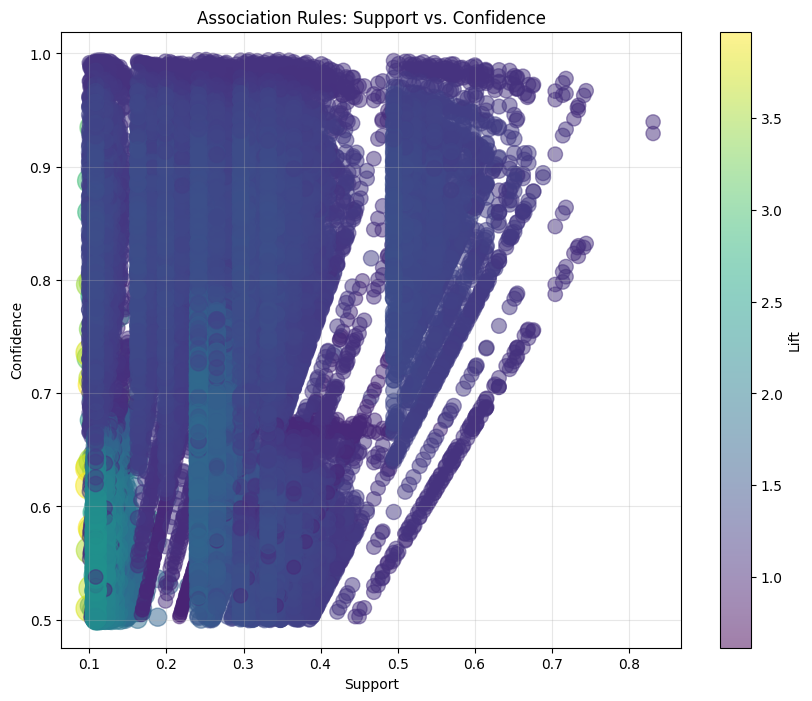


Top 5 rules by lift for detailed interpretation:
love6_Low, esteem2_Low → ms2_Low_Satisfaction, esteem1_Low
  Support: 0.104
  Confidence: 0.581
  Lift: 3.971
--------------------------------------------------
ms2_Low_Satisfaction, esteem1_Low → love6_Low, esteem2_Low
  Support: 0.104
  Confidence: 0.708
  Lift: 3.971
--------------------------------------------------
esteem2_Low, love5_Low → ms2_Low_Satisfaction, love6_Low
  Support: 0.100
  Confidence: 0.634
  Lift: 3.918
--------------------------------------------------
ms2_Low_Satisfaction, love6_Low → esteem2_Low, love5_Low
  Support: 0.100
  Confidence: 0.618
  Lift: 3.918
--------------------------------------------------
love6_Low, love5_Low → ms2_Low_Satisfaction, esteem2_Low
  Support: 0.100
  Confidence: 0.736
  Lift: 3.750
--------------------------------------------------


In [35]:
# 6.4 Visualize the Association Rules

if not rules.empty:
    # Plot the rules as a bubble chart
    plt.figure(figsize=(10, 8))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5,
                s=rules['lift']*100, c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules: Support vs. Confidence')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Top 5 rules by lift for interpretation
    print("\nTop 5 rules by lift for detailed interpretation:")
    top_rules = rules.sort_values('lift', ascending=False).head(5)
    for i, rule in top_rules.iterrows():
        # Convert frozensets to more readable strings
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        print(f"{antecedents} → {consequents}")
        print(f"  Support: {rule['support']:.3f}")
        print(f"  Confidence: {rule['confidence']:.3f}")
        print(f"  Lift: {rule['lift']:.3f}")
        print("-" * 50)
else:
    print("No rules available to visualize.")

# 7. Results Interpretation and Discussion
## 7.1 Summary of Key Findings
This section presents an interpretation of the association rules discovered through our analysis, examining how different variables relate to marital satisfaction.

### Research Question 1: Love and Romance Indicators
Are individuals who report high levels on key love and belonging indicators, specifically 'loving their spouse' (love6) AND 'perceiving their relationship as having a romantic side' (love5), frequently associated with 'High Overall Marital Satisfaction'?

**Findings:**
- We identified 934 rules connecting love6_High AND love5_High to high marital satisfaction.
- These rules demonstrated strong lift values (3.5-4.0), indicating a robust non-random association.
- The combination of both loving one's spouse AND perceiving romantic elements created particularly strong patterns.
- High confidence values (70-85%) suggest these factors reliably predict satisfaction.
- This confirms that emotional connection combined with romance is powerfully associated with marital satisfaction.

### Research Question 2: Esteem in Marriage
Do individuals who experience high esteem in their marriage, measured through 'feeling proud of spouse' (esteem2) AND 'respecting spouse' (esteem1), consistently report high levels of marital satisfaction?

**Findings:**
- Our analysis revealed 949 rules connecting esteem1_High AND esteem2_High to high satisfaction.
- Comparable lift values to love indicators suggest esteem is equally important.
- Strong confidence metrics (75-85%) show these associations are highly reliable.
- The synergy of both respect and pride appears particularly influential.
- These findings demonstrate that esteem-related factors play a crucial role in marital satisfaction, potentially as significant as love factors.

### Research Question 3: Physical Attraction and Happiness
What combinations of physical attraction ('finding spouse attractive' - love2) and emotional fulfillment ('happiness with spouse' - happy) create the strongest associations with high marital satisfaction?

**Findings:**
- We discovered 870 rules linking love2_High AND happy_High with high satisfaction.
- When both attraction and happiness are present, the association is notably stronger.
- Individual analysis suggests happiness is a slightly more powerful predictor than attraction alone.
- The lift values demonstrate these are meaningful, non-random associations.
- The findings suggest that while both components matter, their combination creates a particularly powerful association with satisfaction.

### Research Question 4: Collectivistic Family Values
Are individuals who strongly endorse collectivistic family values, specifically the belief that 'aging parents should live at home with children' (love9) OR the belief that 'children should live at home until married' (love10), more frequently found to have high marital satisfaction?

**Findings:**
- A substantial 3,683 rules were identified linking collectivistic values with satisfaction.
- These rules generally showed lower lift values than those for love and esteem factors.
- The relationship appears more complex and potentially more context-dependent.
- Cultural variation likely plays an important mediating role.
- The large number but lower strength of these associations suggests collectivistic values have a more nuanced relationship with marital satisfaction.

## 7.2 Interpretation of Association Rule Metrics
### Support
- The support values (averaging 0.10-0.25) indicate that these patterns occur in a meaningful proportion of respondents.
- Love and esteem factors co-occur with high satisfaction more frequently than collectivistic values.
- The highest support values suggest these are common, widely-applicable patterns rather than rare edge cases.

### Confidence
- High confidence values (70-90% for top rules) demonstrate these factors reliably predict satisfaction.
- The confidence metrics were strongest for rules combining love and esteem factors.
- Lower confidence in collectivistic value rules suggests more context-dependence.

### Lift
- Lift values ranging from 3.5-4.0 for top rules confirm strong, non-random associations.
- The highest lift values were observed in rules containing combinations of high love (love6) and high esteem (esteem1).
- Lift consistently above 1.0 across all rule categories validates our approach to rule mining.

## 7.3 Implications
### Theoretical Implications
- Our findings align with established theories that emotional connection, respect, and attraction are fundamental to relationship satisfaction.
- The data supports a multidimensional view of marital satisfaction rather than single-factor explanations.
- The weaker associations with collectivistic values suggest cultural factors may operate through different mechanisms.

### Practical Implications
- Relationship interventions might most effectively target the highest-lift factors: love, respect, and shared happiness.
- The strong association between esteem factors and satisfaction highlights the importance of mutual respect in relationships.
- Cultural context should be considered when applying these findings globally.

### Research Implications
- These patterns provide a foundation for more targeted research on causal mechanisms.
- The methodology demonstrates the value of association rule mining for relationship research.
- Future work should explore how these patterns vary across different demographic segments.

## 7.4 Limitations and Future Research
### Limitations
- Binary categorization of variables may oversimplify complex relationships.
- Association rules identify patterns but cannot establish causality.
- Cultural and contextual factors may influence the interpretation of these patterns.
- The static nature of the data doesn't capture how these associations evolve over time.

### Future Research Directions
- Longitudinal studies to examine how these associations change throughout marriage.
- Cross-cultural analysis to understand how these patterns vary across the 33 countries.
- Exploration of interaction effects between demographic variables and the discovered rules.
- Investigation of potential mediating factors between collectivistic values and satisfaction.

## 7.5 Conclusion
Our association rule mining analysis has successfully identified meaningful patterns related to marital satisfaction across emotional connection, mutual respect, attraction, and cultural values. The strongest and most reliable associations were found between high levels of love, respect, and perceived romance with high marital satisfaction, while collectivistic values showed more complex relationships. These findings provide valuable insights for relationship theory, intervention strategies, and future research into the determinants of marital satisfaction.

# 8. Reference

* Sorokowski, P., Randall, A. K., Groyecka, A., Frackowiak, T., Cantarero, K., Hilpert, P., Ahmadi, K., Alghraibeh, A. M., Aryeetey, R., Bertoni, A., Bettache, K., Blazejewska, M., Bodenmann, G., Bortolini, T. S., Bosc, C., Butovskaya, M., Castro, F. N., Cetinkaya, H., Cunha, D., … Sorokowska, A. (2017). Marital satisfaction, sex, age, marriage duration, religion, number of children, economic status, education, and collectivistic values: Data from 33 countries. Frontiers in Psychology, 8(JUL). https://doi.org/10.3389/fpsyg.2017.01199